# Continual Learning 데이터 만들기

## 데이터셋 다운로드

우선 데이터셋 다운로드부터 먼저 시작한다. 데이터셋은 미리 업로드된 구글 드라이브 링크로부터 다운로드하게 된다. 업로드된 파일을 내려받기 전에 프로젝트 디렉터리에 `data` 폴더가 있는지 검사하고 그 폴더 안에 각 데이터의 `.zip` 파일이 미리 받아졌는지 먼저 확인하고 (md5 해싱 이용) 파일이 문제가 없으면 압축을 푼다.

In [1]:
import os
import gdown
import hashlib
import zipfile
from datetime import datetime

def generate_save_folder_name(model_name, strategy, patterns_per_exp=150, memory_strength=0.3, memory_size=200,sample_size=128,alpha=0.5,_lambda=0.5):
    # 현재의 날짜와 시간
    now = datetime.now()
    # 월과 일을 포맷으로 하는 문자열을 생성
    date_str = now.strftime("%m%d")
    if strategy == "gem":
        save_folder_name = model_name.upper() + "_" + strategy.upper() + "_ppe:" +  str(patterns_per_exp) + "_ms:" + str(memory_strength)+ "_"+ date_str
    elif strategy == "replay":
        save_folder_name = model_name.upper() + "_" + strategy.upper() + "_memory_size:" + str(memory_size)+ "_" + date_str
    elif strategy == "agem":
        save_folder_name = model_name.upper() + "_" + strategy.upper() + "_ppe:" +  str(patterns_per_exp) +"_sample_size:" + str(sample_size)+ "_" + date_str
    elif strategy == "lwf":
        save_folder_name = model_name.upper() + "_" + strategy.upper() +  "_alpha:" + str(alpha) + "_"+ date_str
    elif strategy == "ewc":
        save_folder_name = model_name.upper() + "_" + strategy.upper() + "_lambda:" + str(_lambda) + "_"+ date_str
    else: 
        save_folder_name = model_name.upper() + "_" + strategy.upper() + "_"+ date_str

    return "AddPlugin"+save_folder_name   


def get_hash(filename):
    with open(filename, "rb") as f:
        data = f.read()
        hash = hashlib.md5(data).hexdigest()
    
    return hash

data_info = {
    "cwru": {"link": "https://drive.google.com/uc?id=1JfnCzisg0wTSkWw_I5sNLcvQMD5mloJy",
             "hash": "a66d9ea53e5b9959829c1d1057abc377"},
    "mfpt": {"link": "https://drive.google.com/uc?id=1HDmX9-v8dV1-53nvM9lSDj-2-S2_Dss5",
             "hash": "fcf44622538307e33503cb7f24fd33d3"},
    "ottawa": {"link": "https://drive.google.com/uc?id=1WelJO5RMFwKoNdumhtW-__PC881fh4J_",
               "hash": "ca0142f52e950b5579985586a6acc96a"
    }
}

os.chdir(os.path.join(globals()['_dh'][0], ".."))

if not os.path.isdir("./data"):
    os.mkdir("./data")

for key in data_info:
    filename = f"./data/{key}.zip"
    if not os.path.isfile(filename):
        gdown.download(data_info[key]["link"], f"./data/{key}.zip")
    else:
        hash = get_hash(filename)
        if hash != data_info[key]["hash"]:
            os.remove(filename)
            gdown.download(data_info[key]["link"], f"./data/{key}.zip")

for key in data_info:
    filename = f"./data/{key}.zip"
    zipfile.ZipFile(filename).extractall("./data/")


In [2]:
from dfb.download import *

dfs = {}

for key in data_info:
    dfs[key] = download_data(f"./data/{key}", key)

File is already existed, use existed file.


In [3]:
from dfb.download import *
from dfb.databuilder import *

dfs = {}

train_dfs = {}
val_dfs = {}
test_dfs = {}

for key in data_info:
    dfs[key] = download_data(f"./data/{key}", key)

for key in data_info:
    train_dfs[key], val_dfs[key], test_dfs[key] = split_dataframe(dfs[key], 0.6, 0.2)

File is already existed, use existed file.


In [40]:
dfs["cwru"]

,data,fault_type,crack_size,load,label
0,"[0.05319692307692307, 0.08866153846153846, 0.0...",N,000,0,0
1,"[0.046104, -0.03713353846153846, -0.0894959999...",N,000,1,0
2,"[0.06425353846153846, 0.06300184615384616, -0....",N,000,2,0
3,"[0.014603076923076923, 0.05444861538461539, 0....",N,000,3,0
4,"[-0.08300435129740519, -0.19573433133732535, 0...",IR,007,0,4
...,...,...,...,...,...
59,"[0.07244606786427145, 0.04791836327345309, -0....",B,021,3,3
60,"[-0.2652988, 1.6219034, -0.0358072, -2.0149688...",B,028,0,999
61,"[1.6381794, -3.084302, -0.9228492, 3.0810468, ...",B,028,1,999
62,"[-1.6894488, 0.166829, 2.4218688, -1.2890592, ...",B,028,2,999


In [43]:
dfs["mfpt"]

,data,fault_type,sampling_rate,load,shaft_rate,label
0,"[0.8315881, 0.0387017, 0.4676445, 0.6616452, 1...",N,97656,270,25,0
1,"[0.3685337, -0.3983136, -1.303466, -0.04901395...",N,97656,270,25,0
2,"[0.8407559, 0.5152432, -0.03834483, 1.184862, ...",N,97656,270,25,0
3,"[1.301891, -0.6672074, -0.4034944, 0.8490131, ...",OR,97656,270,25,2
4,"[0.3083091, -0.1723548, 0.8998852, 0.6174551, ...",OR,97656,270,25,2
5,"[0.718744, 0.4493211, -0.975775, -0.6292318, -...",OR,97656,270,25,2
6,"[-0.06989686, 1.184481, 1.568139, 0.1725271, 1...",OR,48828,25,25,2
7,"[-0.1909366, 0.3785875, -0.4904225, -1.442238,...",OR,48828,50,25,2
8,"[-1.151945, 0.5270445, 0.169586, -1.615467, -0...",OR,48828,100,25,2
9,"[-0.6417344, -1.733873, -0.896255, 0.5547817, ...",OR,48828,150,25,2


In [50]:
dfs["ottawa"]

,data,fault_type,label
0,"[-0.001541750306307016, 0.0007601794337580708,...",B,1
1,"[0.0040486504981038784, 0.0040486504981038784,...",B,1
2,"[-0.001541750306307016, -0.0018705974116965396...",B,1
3,"[0.0017467207521827538, -0.005816762669868053,...",B,1
4,"[-0.005816762669868053, -0.013709093150313018,...",B,1
5,"[0.004377497604999253, 0.006679427355616288, 0...",B,1
6,"[0.0030621091779207688, 0.002404414964884291, ...",B,1
7,"[-0.013051398945431947, -0.012722551842867358,...",B,1
8,"[-0.004172527147087823, -0.0025282916222252594...",B,1
9,"[-0.0005552089896375123, 0.0007601794337580708...",B,1


In [4]:
# 23/12/18 추가

print(len(dfs["cwru"]["data"][0]))
# train:valid:test = 6:2:2로 사전 분할 - 추가 실험에서는 train_dfs, val_dfs, test_dfs 사용
print(len(train_dfs["cwru"]["data"][0]))
print(len(val_dfs["cwru"]["data"][0]))
print(len(test_dfs["cwru"]["data"][0]))

# 나머지 데이터도 마찬가지
print("")
print(len(dfs["mfpt"]["data"][0])) # 585936 / 97656 = 6초간 측정한 데이터
# train:valid:test = 6:2:2로 사전 분할 - 추가 실험에서는 train_dfs, val_dfs, test_dfs 사용
print(len(train_dfs["mfpt"]["data"][0]))
print(len(val_dfs["mfpt"]["data"][0]))
print(len(test_dfs["mfpt"]["data"][0]))

243938
146362
48788
48788

585936
351561
117187
117188


(121991,)
IR


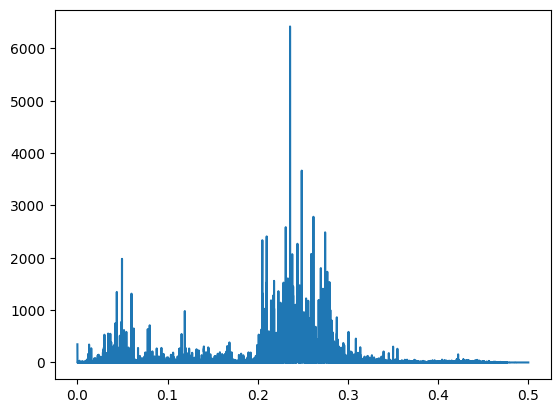

In [5]:
# 데이터 시각화

import matplotlib.pyplot as plt

data_idx = 15

x = dfs["cwru"].iloc[data_idx]["data"]
x_fft = np.fft.fft(x)
freq = np.fft.fftfreq(x.shape[-1])
idx_start = 6000

print(x.shape)
print(dfs["cwru"].iloc[data_idx].fault_type)
# plt.plot(x[idx_start:idx_start+4096])
# plt.plot(x)

plt.plot(freq[:x_fft.shape[0] // 2], np.abs(x_fft.real)[:x_fft.shape[0] // 2])

In [10]:
# 사전에 split하지 않은 기존 코드 - 삭제 필요

from dfb.databuilder import *

# level 1 데이터셋 제작

df_cwru = dfs["cwru"]
df_mfpt = dfs["mfpt"]
df_ottawa = dfs["ottawa"]

data_level1 = {}

df_load1 = df_cwru[(df_cwru["load"] == 1) & (df_cwru["label"] != 999)]
df_load2 = df_cwru[(df_cwru["load"] == 2) & (df_cwru["label"] != 999)]
df_load3 = df_cwru[(df_cwru["load"] == 3) & (df_cwru["label"] != 999)]

data_level1["A"] = build_from_dataframe(df_load1, sample_length=4096, shift=2048)
data_level1["B"] = build_from_dataframe(df_load2, sample_length=4096, shift=2048)
data_level1["C"] = build_from_dataframe(df_load3, sample_length=4096, shift=2048)

# level 2 데이터셋 제작

def set_label_level2(row):
    label_map = {
        "N": 0,
        "B": 1,
        "IR": 2,
        "OR@06": 3
    }
    row["label"] = label_map[row["fault_type"]]
    return row

data_level2 = {}

df_normal = df_cwru[(df_cwru["fault_type"] == "N")]
df_007 = df_cwru[(df_cwru["crack_size"] == "007") & (df_cwru["label"] != 999)]
df_014 = df_cwru[(df_cwru["crack_size"] == "014") & (df_cwru["label"] != 999)]
df_021 = df_cwru[(df_cwru["crack_size"] == "021") & (df_cwru["label"] != 999)]

df_007 = pd.concat(objs=(df_normal, df_007)).apply(set_label_level2, axis="columns")
df_014 = pd.concat(objs=(df_normal, df_014)).apply(set_label_level2, axis="columns")
df_021 = pd.concat(objs=(df_normal, df_021)).apply(set_label_level2, axis="columns")

data_level2["A"] = build_from_dataframe(df_007, sample_length=4096, shift=2048)
data_level2["B"] = build_from_dataframe(df_014, sample_length=4096, shift=2048)
data_level2["C"] = build_from_dataframe(df_021, sample_length=4096, shift=2048)

# level 3 데이터셋 제작

data_level3 = {}

def set_label_level3(row):
    label_map = {
        "N": 0,
        "IR": 1,
        "OR@06": 2,
        "OR": 2
    }
    row["label"] = label_map[row["fault_type"]]
    return row

sample_map = {
    "cwru": {
        "0": 105,
        "1": 35,
        "2": 35
    },
    "mfpt": {
        "0": 140,
        "1": 60,
        "2": 42
    },
    "ottawa": {
        "0": 35,
        "1": 35,
        "2": 35
    }
}

filter_cwru = df_cwru[df_cwru["label"] != 999]
filter_cwru = filter_cwru[(df_cwru["fault_type"] == "N") | (df_cwru["fault_type"] == "IR") | (df_cwru["fault_type"] == "OR@06")].reset_index(drop=True)
filter_mfpt = df_mfpt[(df_mfpt["fault_type"] == "N") | (df_mfpt["fault_type"] == "IR") | (df_mfpt["fault_type"] == "OR")].reset_index(drop=True)
filter_ottawa = df_ottawa[(df_ottawa["fault_type"] == "N") | (df_ottawa["fault_type"] == "IR") | (df_ottawa["fault_type"] == "OR")].reset_index(drop=True)

filter_cwru = filter_cwru.apply(set_label_level3, axis="columns")
filter_mfpt = filter_mfpt.apply(set_label_level3, axis="columns")
filter_ottawa = filter_ottawa.apply(set_label_level3, axis="columns")

data_level3["A"] = bootstrap_from_dataframe(filter_cwru, 4096, 100, False, sample_map["cwru"])
data_level3["B"] = bootstrap_from_dataframe(filter_mfpt, 4096, 100, False, sample_map["mfpt"])
data_level3["C"] = bootstrap_from_dataframe(filter_ottawa, 4096, 100, False, sample_map["ottawa"])

/tmp/ipykernel_85383/1309161703.py:81: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filter_cwru = filter_cwru[(df_cwru["fault_type"] == "N") | (df_cwru["fault_type"] == "IR") | (df_cwru["fault_type"] == "OR@06")].reset_index(drop=True)


In [23]:
# 사전에 split하지 않은 기존 코드 - 삭제 필요

print(len(data_level3["A"])) # x, y -> 2개
print(len(data_level3["A"][0])) # CWRU 데이터셋 전체의 개수 (N 420개, IR 420개, OR 420개)
print(np.count_nonzero(data_level3["A"][1] == 0)) # N
print(np.count_nonzero(data_level3["A"][1] == 1)) # IR
print(np.count_nonzero(data_level3["A"][1] == 2)) # OR
print(len(data_level3["A"][0][0])) # bootstrap_from_dataframe 함수를 이용해 만든 데이터의 길이(4096)

2
1260
420
420
420
4096


In [6]:
# 23/12/18 추가

from dfb.databuilder import *

train_df_cwru = train_dfs["cwru"]
train_df_mfpt = train_dfs["mfpt"]
train_df_ottawa = train_dfs["ottawa"]

val_df_cwru = val_dfs["cwru"]
val_df_mfpt = val_dfs["mfpt"]
val_df_ottawa = val_dfs["ottawa"]

test_df_cwru = test_dfs["cwru"]
test_df_mfpt = test_dfs["mfpt"]
test_df_ottawa = test_dfs["ottawa"]

sample_length = 4096
shift = 2048

# level 1 데이터셋 제작

train_data_level1 = {}
val_data_level1 = {}
test_data_level1 = {}

def generate_level1(df, sample_length, shift):
    data = {}
    df_A = df[(df["load"] == 1) & (df["label"] != 999)]
    df_B = df[(df["load"] == 2) & (df["label"] != 999)]
    df_C = df[(df["load"] == 3) & (df["label"] != 999)]

    data["A"] = build_from_dataframe(df_A, sample_length=sample_length, shift=shift)
    data["B"] = build_from_dataframe(df_B, sample_length=sample_length, shift=shift)
    data["C"] = build_from_dataframe(df_C, sample_length=sample_length, shift=shift)

    return data

train_data_level1 = generate_level1(train_df_cwru, sample_length, shift)
val_data_level1 = generate_level1(val_df_cwru, sample_length, shift)
test_data_level1 = generate_level1(test_df_cwru, sample_length, shift)

# level 2 데이터셋 제작

def set_label_level2(row):
    label_map = {
        "N": 0,
        "B": 1,
        "IR": 2,
        "OR@06": 3
    }
    row["label"] = label_map[row["fault_type"]]
    return row

def generate_level2(df, sample_length, shift):
    data = {}
    df_normal = df[(df["fault_type"] == "N")]
    df_007 = df[(df["crack_size"] == "007") & (df["label"] != 999)]
    df_014 = df[(df["crack_size"] == "014") & (df["label"] != 999)]
    df_021 = df[(df["crack_size"] == "021") & (df["label"] != 999)]
    df_A = pd.concat(objs=(df_normal, df_007)).apply(set_label_level2, axis="columns")
    df_B = pd.concat(objs=(df_normal, df_014)).apply(set_label_level2, axis="columns")
    df_C = pd.concat(objs=(df_normal, df_021)).apply(set_label_level2, axis="columns")

    data["A"] = build_from_dataframe(df_A, sample_length=sample_length, shift=shift)
    data["B"] = build_from_dataframe(df_B, sample_length=sample_length, shift=shift)
    data["C"] = build_from_dataframe(df_C, sample_length=sample_length, shift=shift)

    return data

train_data_level2 = generate_level2(train_df_cwru, sample_length, shift)
val_data_level2 = generate_level2(val_df_cwru, sample_length, shift)
test_data_level2 = generate_level2(test_df_cwru, sample_length, shift)

# level 3 데이터셋 제작

data_level3 = {}

def set_label_level3(row):
    label_map = {
        "N": 0,
        "IR": 1,
        "OR@06": 2,
        "OR": 2
    }
    row["label"] = label_map[row["fault_type"]]
    return row

def generate_level3(df_cwru, df_mfpt, df_ottawa, sample_length, sample_ratio): # sample_ratio: train, valid, test마다 각각의 샘플 비율(0.6, 0.2, 0.2) 만큼 생성
    sample_map = { # CWRU, MFPT, OTTAWA마다 N, IR, OR 데이터 개수가 다름 -> 420개를 맞춰주기 위해 데이터 하나마다 생성할 샘플의 수를 다르게 함
        "cwru": {
            "0": round(1*105*sample_ratio), # 데이터 4개 -> 샘플수 105개
            "1": round(1*35*sample_ratio),  # 데이터 12개 -> 샘플수 35개
            "2": round(1*35*sample_ratio)   # 데이터 12개 -> 샘플수 35개
        },
        "mfpt": {
            "0": round(1*140*sample_ratio), # 데이터 3개 -> 샘플수 140개
            "1": round(1*60*sample_ratio),  # 데이터 7개 -> 샘플수 60개
            "2": round(1*42*sample_ratio)   # 데이터 10개 -> 샘플수 42개
        },
        "ottawa": { # 각각 데이터 12개 -> 샘플수 35개
            "0": round(1*35*sample_ratio),
            "1": round(1*35*sample_ratio),
            "2": round(1*35*sample_ratio)
        }
    }
    data = {}

    filter_cwru = df_cwru[df_cwru["label"] != 999]
    filter_cwru = filter_cwru[(df_cwru["fault_type"] == "N") | (df_cwru["fault_type"] == "IR") | (df_cwru["fault_type"] == "OR@06")].reset_index(drop=True)
    filter_mfpt = df_mfpt[(df_mfpt["fault_type"] == "N") | (df_mfpt["fault_type"] == "IR") | (df_mfpt["fault_type"] == "OR")].reset_index(drop=True)
    filter_ottawa = df_ottawa[(df_ottawa["fault_type"] == "N") | (df_ottawa["fault_type"] == "IR") | (df_ottawa["fault_type"] == "OR")].reset_index(drop=True)

    filter_cwru = filter_cwru.apply(set_label_level3, axis="columns")
    filter_mfpt = filter_mfpt.apply(set_label_level3, axis="columns")
    filter_ottawa = filter_ottawa.apply(set_label_level3, axis="columns")

    data["A"] = bootstrap_from_dataframe(filter_cwru, sample_length=sample_length, n_sample=100, sample_ratio=sample_ratio, dataset_name="cwru", one_hot=False, n_map=sample_map["cwru"])
    data["B"] = bootstrap_from_dataframe(filter_mfpt, sample_length=sample_length, n_sample=100, sample_ratio=sample_ratio, dataset_name="mfpt", one_hot=False, n_map=sample_map["mfpt"])
    data["C"] = bootstrap_from_dataframe(filter_ottawa, sample_length=sample_length, n_sample=100, sample_ratio=sample_ratio, dataset_name="ottawa", one_hot=False, n_map=sample_map["ottawa"])

    return data

train_data_level3 = generate_level3(train_df_cwru, train_df_mfpt, train_df_ottawa, sample_length, 0.6)
val_data_level3 = generate_level3(val_df_cwru, val_df_mfpt, val_df_ottawa, sample_length, 0.2)
test_data_level3 = generate_level3(test_df_cwru, test_df_mfpt, test_df_ottawa, sample_length, 0.2)

/tmp/ipykernel_91788/3043107733.py:109: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filter_cwru = filter_cwru[(df_cwru["fault_type"] == "N") | (df_cwru["fault_type"] == "IR") | (df_cwru["fault_type"] == "OR@06")].reset_index(drop=True)
/tmp/ipykernel_91788/3043107733.py:109: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filter_cwru = filter_cwru[(df_cwru["fault_type"] == "N") | (df_cwru["fault_type"] == "IR") | (df_cwru["fault_type"] == "OR@06")].reset_index(drop=True)
/tmp/ipykernel_91788/3043107733.py:109: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filter_cwru = filter_cwru[(df_cwru["fault_type"] == "N") | (df_cwru["fault_type"] == "IR") | (df_cwru["fault_type"] == "OR@06")].reset_index(drop=True)


In [7]:
# 23/12/18 추가
# 데이터 확인용

print(len(train_data_level3["A"])) # x, y -> 2개
print(len(train_data_level3["A"][0])) # CWRU 데이터셋 중 train data의 개수 (N 252개, IR 252개, OR 252개)
print(np.count_nonzero(train_data_level3["A"][1] == 0)) # N
print(np.count_nonzero(train_data_level3["A"][1] == 1)) # IR
print(np.count_nonzero(train_data_level3["A"][1] == 2)) # OR
print(len(train_data_level3["A"][0][0])) # bootstrap_from_dataframe 함수를 이용해 만든 데이터의 길이(4096)

print("")
print(len(val_data_level3["A"][0])) # CWRU 데이터셋 중 valid data의 개수 (N 84개, IR 84개, OR 84개)
print(np.count_nonzero(val_data_level3["A"][1] == 0)) # N
print(np.count_nonzero(val_data_level3["A"][1] == 1)) # IR
print(np.count_nonzero(val_data_level3["A"][1] == 2)) # OR

print("")
print(len(test_data_level3["A"][0])) # CWRU 데이터셋 중 test data의 개수 (N 84개, IR 84개, OR 84개)
print(np.count_nonzero(test_data_level3["A"][1] == 0)) # N
print(np.count_nonzero(test_data_level3["A"][1] == 1)) # IR
print(np.count_nonzero(test_data_level3["A"][1] == 2)) # OR

# MFPT의 경우 
print("")
print(len(train_data_level3["B"][0])) # MFPT 데이터셋 중 train data의 개수 (N 252개, IR 252개, OR 252개)
print(np.count_nonzero(train_data_level3["B"][1] == 0)) # N
print(np.count_nonzero(train_data_level3["B"][1] == 1)) # IR
print(np.count_nonzero(train_data_level3["B"][1] == 2)) # OR
print(len(train_data_level3["B"][0][0])) # bootstrap_from_dataframe 함수를 이용해 만든 데이터의 길이(4096)

print("")
print(len(val_data_level3["B"][0])) # MFPT 데이터셋 중 valid data의 개수 (N 84개, IR 84개, OR 84개)
print(np.count_nonzero(val_data_level3["B"][1] == 0)) # N
print(np.count_nonzero(val_data_level3["B"][1] == 1)) # IR
print(np.count_nonzero(val_data_level3["B"][1] == 2)) # OR

print("")
print(len(test_data_level3["B"][0])) # MFPT 데이터셋 중 test data의 개수 (N 84개, IR 84개, OR 84개)
print(np.count_nonzero(test_data_level3["B"][1] == 0)) # N
print(np.count_nonzero(test_data_level3["B"][1] == 1)) # IR
print(np.count_nonzero(test_data_level3["B"][1] == 2)) # OR

# OTTAWA의 경우 
print("")
print(len(train_data_level3["C"][0])) # OTTAWA 데이터셋 중 train data의 개수 (N 252개, IR 252개, OR 252개)
print(np.count_nonzero(train_data_level3["C"][1] == 0)) # N
print(np.count_nonzero(train_data_level3["C"][1] == 1)) # IR
print(np.count_nonzero(train_data_level3["C"][1] == 2)) # OR
print(len(train_data_level3["C"][0][0])) # bootstrap_from_dataframe 함수를 이용해 만든 데이터의 길이(4096)

print("")
print(len(val_data_level3["C"][0])) # OTTAWA 데이터셋 중 valid data의 개수 (N 84개, IR 84개, OR 84개)
print(np.count_nonzero(val_data_level3["C"][1] == 0)) # N
print(np.count_nonzero(val_data_level3["C"][1] == 1)) # IR
print(np.count_nonzero(val_data_level3["C"][1] == 2)) # OR

print("")
print(len(test_data_level3["C"][0])) # OTTAWA 데이터셋 중 test data의 개수 (N 84개, IR 84개, OR 84개)
print(np.count_nonzero(test_data_level3["C"][1] == 0)) # N
print(np.count_nonzero(test_data_level3["C"][1] == 1)) # IR
print(np.count_nonzero(test_data_level3["C"][1] == 2)) # OR

2
756
252
252
252
4096

252
84
84
84

252
84
84
84

756
252
252
252
4096

252
84
84
84

252
84
84
84

756
252
252
252
4096

252
84
84
84

252
84
84
84


## 데이터 분할 및 데이터로더 래핑

우선 데이터를 분할한다. 훈련, 검증, 테스트 데이터셋을 빠르게 생성하기 위해 dfb의 databuilder 모듈에 구현되어 있는 `train_val_test_split`함수를 이용한다. 우선 각 데이터는 6:2:2로 분할했다. 그리고 numpy array를 PyTorch에서 사용가능한 데이터로더로 만들기 위해서는 추가로 모델 입력의 길이, 모델의 transform (데이터 전처리 함수), 배치 크기, num_worker가 필요하다. 모델 입력의 길이와 transform은 모델에 따라 달라진다. 현재 이 예제에서 구현되어 있는 모델의 입력 길이와 transform은 experiment 모듈의 get_sample_length와 get_transform을 통해 바로 가져올 수 있다. 그렇게 한 후에 dataset 모듈에서 제공하는 `DatasetHandler`클래스를 사용해서 각 level과 experience에 해당하는 numpy array를 `assign` 메소드를 통해 PyTorch 데이터로더로 변환하게 된다.

In [8]:
from dfb.dataset import *
from dfb.processing import *    # Normalize 클래스 사용하기
import experiment
import torchvision.transforms as transforms
from torch.utils.data import TensorDataset


# Sample-wise MinMax Normalize 클래스
class MinMaxScaling:
    def __init__(self, scale=1.0, symmetric=True) -> None:
        self.scale = scale
        self.symmetric = symmetric

    def __call__(self, x):
        x = torch.from_numpy(x)
        min_val = torch.min(x).item()
        max_val = torch.max(x).item()

        if self.symmetric:
            x = (x - min_val) / (max_val - min_val) * self.scale - (self.scale * 0.5)
        else:
            x = (x - min_val) / (max_val - min_val) * self.scale

        return x.numpy()


def create_transforms(existing_transforms):
    minmax_transform = MinMaxScaling(scale=1, symmetric=True)
    return transforms.Compose([minmax_transform] + existing_transforms.transforms)




In [25]:
# 사전에 split하지 않은 기존 코드 - 삭제 필요

# 사용할 모델
model_name = "wdcnn2"

sample_length = experiment.get_sample_length(model_name)
tf_data = experiment.get_transform(model_name) 
tf_data = transforms.Compose(tf_data)

tf_label = NpToTensor()
batch_size = 128
num_worker = 4

data_handler = DatasetHandler()

def process_and_assign(
    data, labels, split_ratios, seed, shuffle, standardize, 
    sample_length, tag, existing_transforms, tf_label, batch_size, num_workers):
    # Split the data
    (X_train, y_train), (X_val, y_val), (X_test, y_test) = \
        train_val_test_split(data, labels, *split_ratios, seed, shuffle, standardize)

    # Create MinMaxScaling transforms
    tf_data_transform = create_transforms(existing_transforms)

    # Assign to data handler
    data_handler.assign(
        X_train, y_train, X_val, y_val, X_test, y_test,
        sample_length, tag, tf_data_transform, tf_label, batch_size, num_workers
    )

seed = 42
np.random.seed(seed)
torch.manual_seed(seed)

tags = ['A', 'B', 'C']
data_levels = [data_level1, data_level2, data_level3]
level_tags = ['1', '2', '3']

for data_level, level_tag in zip(data_levels, level_tags):
    for tag in tags:
        process_and_assign(
            data_level[tag][0], data_level[tag][1], 
            [0.2, 0.2, 0.6], seed, True, True, 
            sample_length, level_tag + tag, tf_data, tf_label, batch_size, num_worker
        )

In [9]:
# 23/12/18 추가 (LEVEL 3만 사용)

# 사용할 모델
model_name = "wdcnn2"

sample_length = experiment.get_sample_length(model_name)
tf_data = experiment.get_transform(model_name) 
tf_data = transforms.Compose(tf_data)
tf_data_transform = create_transforms(tf_data)
tf_label = NpToTensor()
batch_size = 128
num_worker = 4

data_handler = DatasetHandler()

seed = 42
np.random.seed(seed)
torch.manual_seed(seed)

# ====================== Level 1 (오류 있음)
data_handler.assign(
    train_data_level1["A"][0], train_data_level1["A"][1], val_data_level1["A"][0], val_data_level1["A"][1], test_data_level1["A"][0], test_data_level1["A"][1],
    sample_length, "1A", tf_data_transform, tf_label, batch_size, num_worker
)

data_handler.assign(
    train_data_level1["B"][0], train_data_level1["B"][1], val_data_level1["B"][0], val_data_level1["B"][1], test_data_level1["B"][0], test_data_level1["B"][1],
    sample_length, "1B", tf_data_transform, tf_label, batch_size, num_worker
)

data_handler.assign(
    train_data_level1["C"][0], train_data_level1["C"][1], val_data_level1["C"][0], val_data_level1["C"][1], test_data_level1["C"][0], test_data_level1["C"][1],
    sample_length, "1C", tf_data_transform, tf_label, batch_size, num_worker
)

# ====================== Level 2 (오류 있음)
data_handler.assign(
    train_data_level2["A"][0], train_data_level2["A"][1], val_data_level2["A"][0], val_data_level2["A"][1], test_data_level2["A"][0], test_data_level2["A"][1],
    sample_length, "2A", tf_data_transform, tf_label, batch_size, num_worker
)

data_handler.assign(
    train_data_level2["B"][0], train_data_level2["B"][1], val_data_level2["B"][0], val_data_level2["B"][1], test_data_level2["B"][0], test_data_level2["B"][1],
    sample_length, "2B", tf_data_transform, tf_label, batch_size, num_worker
)

data_handler.assign(
    train_data_level2["C"][0], train_data_level2["C"][1], val_data_level2["C"][0], val_data_level2["C"][1], test_data_level2["C"][0], test_data_level2["C"][1],
    sample_length, "2C", tf_data_transform, tf_label, batch_size, num_worker
)
# ====================== Level 3

data_handler.assign(
    train_data_level3["A"][0], train_data_level3["A"][1], val_data_level3["A"][0], val_data_level3["A"][1], test_data_level3["A"][0], test_data_level3["A"][1],
    sample_length, "3A", tf_data_transform, tf_label, batch_size, num_worker
)

data_handler.assign(
    train_data_level3["B"][0], train_data_level3["B"][1], val_data_level3["B"][0], val_data_level3["B"][1], test_data_level3["B"][0], test_data_level3["B"][1],
    sample_length, "3B", tf_data_transform, tf_label, batch_size, num_worker
)

data_handler.assign(
    train_data_level3["C"][0], train_data_level3["C"][1], val_data_level3["C"][0], val_data_level3["C"][1], test_data_level3["C"][0], test_data_level3["C"][1],
    sample_length, "3C", tf_data_transform, tf_label, batch_size, num_worker
)

In [10]:
# 데이터로더 접근해보기
data_handler.dataloaders["3A"]["train"]

#데이터셋 접근해보기
data_handler.dataloaders["3A"]["train"].dataset

#원본 numpy array 접근하기
data_handler.dataloaders["3A"]["train"].dataset[0]

#각 단계별 데이터셋 길이 출력해보기
for key in data_handler.dataloaders:
    print('---------'*10)
    print(f"{key}: ", end=' ')
    for phase in data_handler.dataloaders[key]:
        print(f"{phase} dataset length: {len(data_handler.dataloaders[key][phase].dataset)} |", end=' ')
    print()


------------------------------------------------------------------------------------------
1A:  train dataset length: 446 | val dataset length: 136 | test dataset length: 136 | 
------------------------------------------------------------------------------------------
1B:  train dataset length: 447 | val dataset length: 136 | test dataset length: 136 | 
------------------------------------------------------------------------------------------
1C:  train dataset length: 448 | val dataset length: 137 | test dataset length: 137 | 
------------------------------------------------------------------------------------------
2A:  train dataset length: 901 | val dataset length: 281 | test dataset length: 281 | 
------------------------------------------------------------------------------------------
2B:  train dataset length: 900 | val dataset length: 280 | test dataset length: 280 | 
------------------------------------------------------------------------------------------
2C:  train dataset 

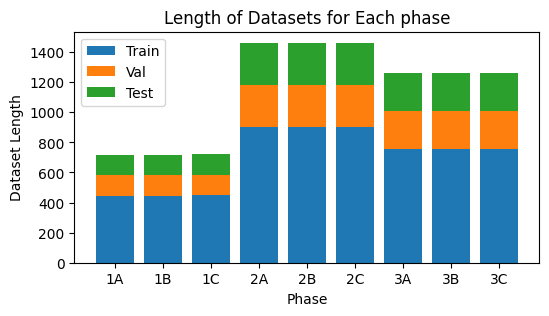

In [11]:
from matplotlib import pyplot as plt
step = []  # 1A, 1B, 1C, 2A, 2B, 2C, 3A, 3B, 3C
train_lengths = []  
val_lengths = []  
test_lengths = []  

for phase in data_handler.dataloaders:
    step.append(phase)
    train_lengths.append(len(data_handler.dataloaders[phase]["train"].dataset))
    val_lengths.append(len(data_handler.dataloaders[phase]["val"].dataset))
    test_lengths.append(len(data_handler.dataloaders[phase]["test"].dataset))

plt.figure(figsize=(6, 3))
train_bars = plt.bar(step, train_lengths, label='Train')
val_bars = plt.bar(step, val_lengths, label='Val', bottom=train_lengths)
test_bars = plt.bar(step, test_lengths, label='Test', bottom=np.array(train_lengths) + np.array(val_lengths))

plt.ylabel('Dataset Length')
plt.xlabel('Phase')
plt.legend()

plt.title('Length of Datasets for Each phase')
plt.show()


In [12]:
# 3B train 데이터셋의 150번째 데이터 시각화
print(data_handler.dataloaders["3B"]["train"])  
print(len(data_handler.dataloaders["3B"]["train"].dataset))  # 756
print(len(data_handler.dataloaders["3B"]["train"].dataset[100])) # data, label이 있있음
print(data_handler.dataloaders["3B"]["train"].dataset[150][0]) # [0]은 data, [1]은 label
print(data_handler.dataloaders["3B"]["train"].dataset[150][0].shape)

756
2
tensor([[-0.1201,  0.0020, -0.1452,  ..., -0.2152, -0.1224, -0.1370]])
torch.Size([1, 2048])


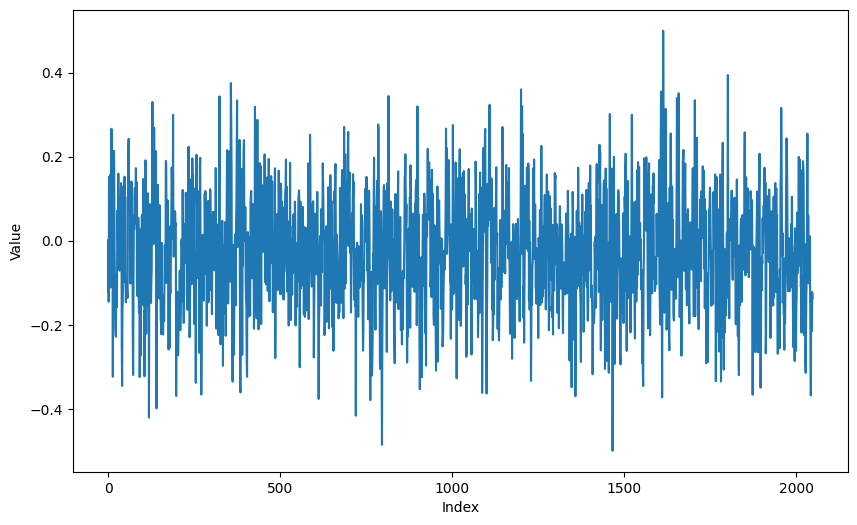

In [13]:
data = data_handler.dataloaders["3B"]["train"].dataset[150][0]

plt.figure(figsize=(10, 6))
plt.plot(data[0])  # Assume the data is 1D after removing the first dimension
plt.xlabel('Index')
plt.ylabel('Value')
plt.show()


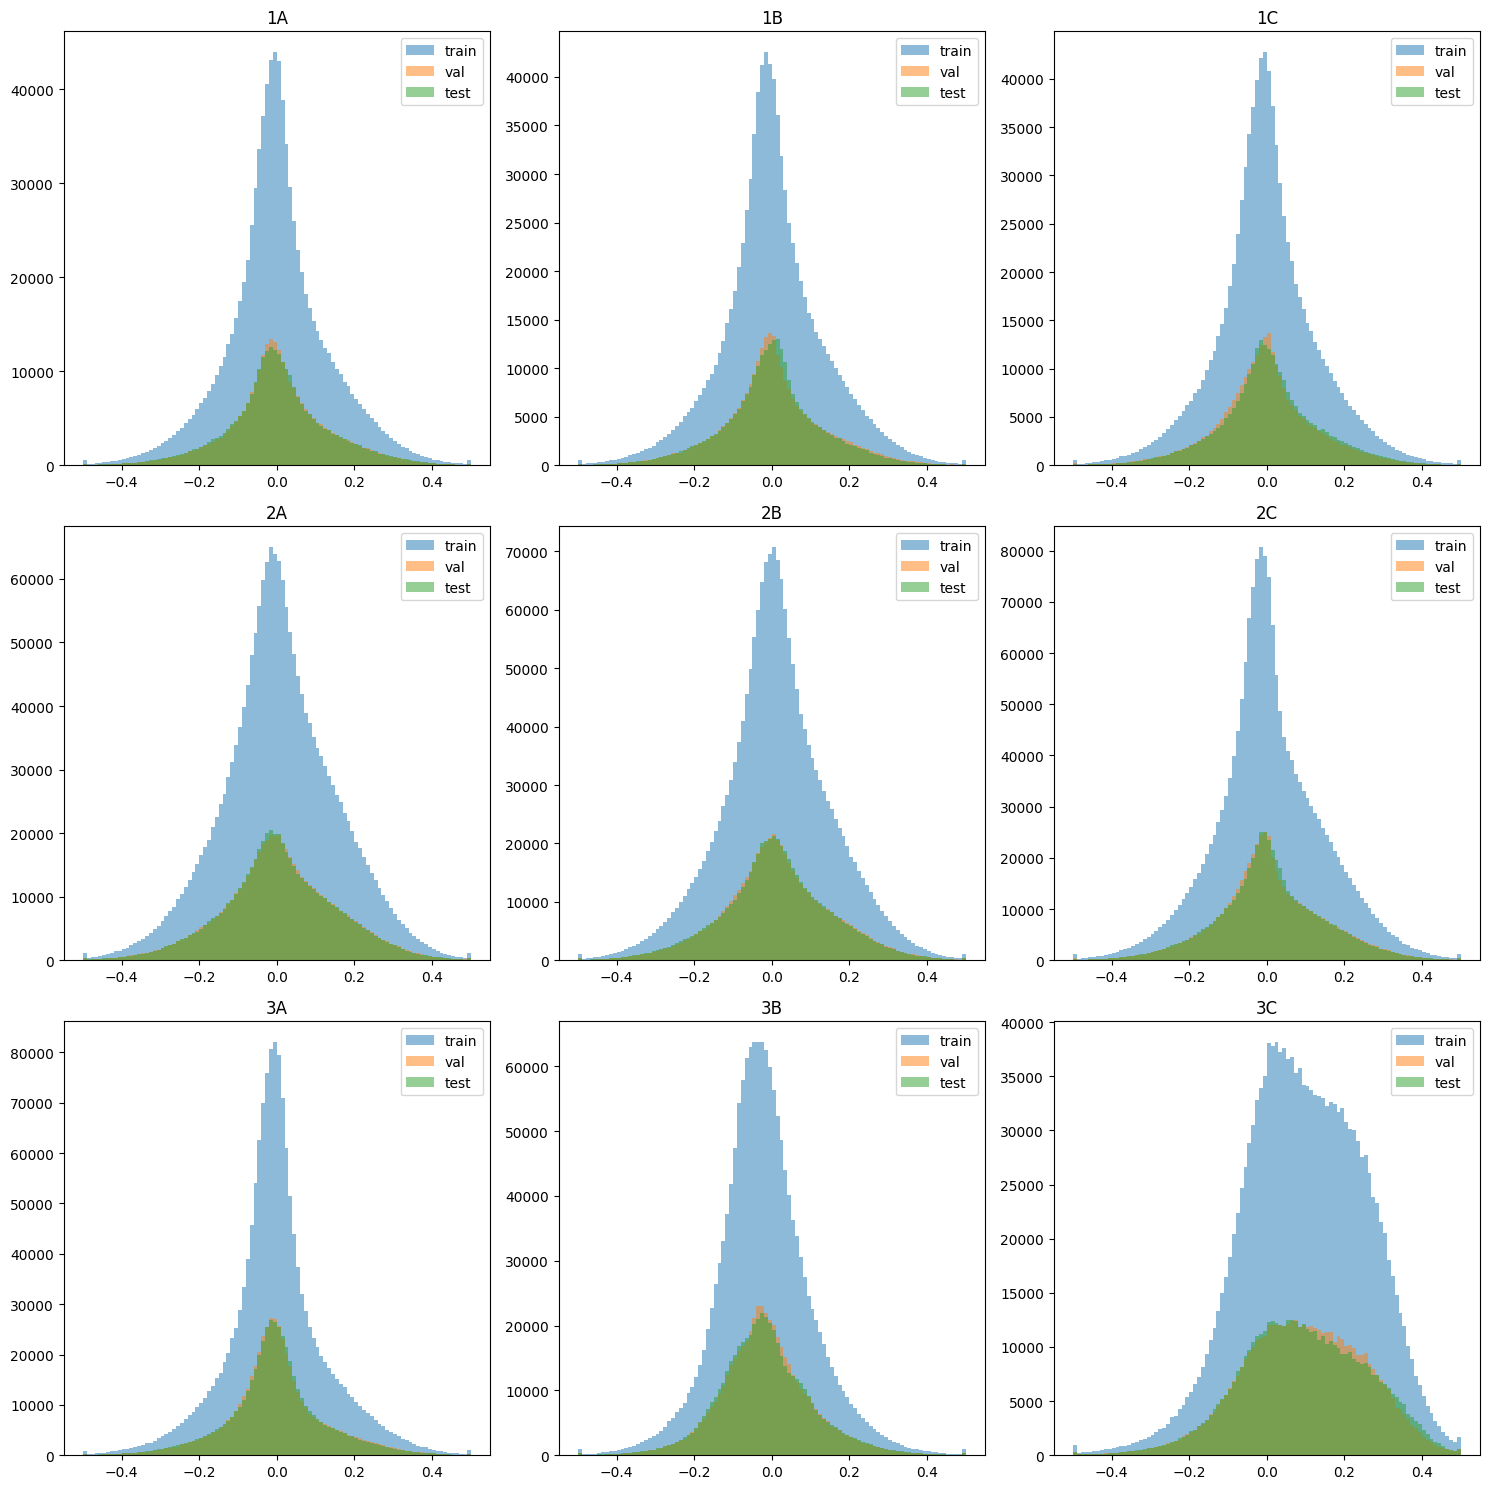

In [14]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

for i, step in enumerate(data_handler.dataloaders.keys()): # step은 1A, 1B, 1C, 2A, 2B, 2C, 3A, 3B, 3C
    for split in data_handler.dataloaders[step]: #split은 train, val, test
        data = []
        for sample, _ in data_handler.dataloaders[step][split]: # sample은 data, _는 label
            data.extend(sample.flatten().tolist())
        
        axes[i // 3][i % 3].hist(data, bins=100, alpha=0.5, label=split)
    
    axes[i // 3][i % 3].set_title(step)
    axes[i // 3][i % 3].legend()

plt.tight_layout()
plt.show()


## 모델 가져오기

모델은 아주 간단하게 가져올 수 있다. dfb의 model 폴더에 있는 모델을 아무거나 가져오면 된다.

In [27]:
from dfb.model.wdcnn2 import *

## Continual Learning

여기서부터 continual learning을 해보자!

In [28]:
import avalanche
import json

from avalanche.benchmarks.generators import dataset_benchmark
from avalanche.benchmarks.utils import make_classification_dataset
from torch.optim import SGD, Adam
from torch.nn import CrossEntropyLoss
import torch.nn as nn
from avalanche.training.supervised import JointTraining, Naive, CWRStar, Replay, GDumb, Cumulative, LwF, GEM, EWC, AGEM
from avalanche.evaluation.metrics import forgetting_metrics, \
accuracy_metrics, loss_metrics, timing_metrics
from avalanche.logging import InteractiveLogger, TextLogger
from avalanche.training.plugins import EvaluationPlugin, EarlyStoppingPlugin, ReplayPlugin, \
    CWRStarPlugin, GEMPlugin, LwFPlugin, EWCPlugin



print(avalanche.__version__)

0.3.1


In [29]:
def classes_in_level(level):
    if level == 1:
        return 10
    elif level == 2:
        return 4
    elif level == 3:
        return 3

In [30]:
class CLExperiment:
    
    def __init__(self, opt) -> None:

        self.opt = opt
        self.data_handler = data_handler
        self.avg_results = []
        self.time_results = []
        self.num_tasks = 0

    def get_attr(self, name: str):
        if hasattr(self.opt, name):
            return getattr(self.opt, name)
        else:
            return None

    def _make_benchmark_with_level(self, data_handler: DatasetHandler, level: int):

        assert level in [1, 2, 3], "Benchmark level must be one of (1, 2, 3)"

        train_set_list = [data_handler.dataloaders[f'{level}{task}']['train'].dataset for task in ('A', 'B', 'C')]
        test_set_list = [data_handler.dataloaders[f'{level}{task}']['test'].dataset for task in ('A', 'B', 'C')]

        # 'make_classification_dataset' requires that the dataset has an attribute named 'targets'
        for train_set, test_set in zip(train_set_list, test_set_list):
            setattr(train_set, 'targets', train_set.label)
            setattr(test_set, 'targets', test_set.label)

        # AvalancheDatasets with task labels
        train_set_list = [make_classification_dataset(dataset, task_labels=idx) for idx, dataset in enumerate(train_set_list)]
        test_set_list = [make_classification_dataset(dataset, task_labels=idx) for idx, dataset in enumerate(test_set_list)]

        # Compose benchmark
        self.scenario = dataset_benchmark(
            train_set_list,
            test_set_list
        )

    def initialize(self, model, scenario=None, optimizer=None, criterion=None, eval_plugin=None):
        
        self.model = model
        level = self.get_attr('level')

        if not scenario:
            self._make_benchmark_with_level(self.data_handler, level)
        else:
            self.scenario = scenario

        self._initialize_trainig_stuff(self.model, optimizer, criterion)
        self._initialize_cl_strategy(eval_plugin)


    def _initialize_trainig_stuff(self, model: nn.Module, optimizer=None, criterion=None):

        lr = self.get_attr('lr')
        momentum = self.get_attr('momentum')
        weight_decay = self.get_attr('weight_decay')

        if not optimizer:
            optimizer = SGD(
                model.parameters(), lr=lr,
                momentum=momentum, weight_decay=weight_decay
            )
        self.optimizer = optimizer

        if not criterion:
            criterion = CrossEntropyLoss()
        self.criterion = criterion

    def _initialize_cl_strategy(self, eval_plugin):

        if not eval_plugin:
            eval_plugin = EvaluationPlugin(
                accuracy_metrics(epoch=True, experience=True, stream=True),
                loss_metrics(epoch=True, experience=True, stream=True),
                forgetting_metrics(experience=True, stream=True),
                timing_metrics(epoch=True), ## 최근에 추가된 metric
                loggers=self._initialize_loggers(self.get_attr('interactive'))
            )

        cl_type = self.get_attr('strategy').lower()

        common_args = dict(
            model=self.model,
            optimizer=self.optimizer,
            criterion=self.criterion,
            train_epochs=self.get_attr('epoch'),
            train_mb_size=self.get_attr('batch_size'),
            eval_mb_size=self.get_attr('batch_size'),
            device=self.get_attr('device'),
            evaluator=eval_plugin
        )

        if cl_type == 'naive':
            self.strategy = Naive(**common_args)
        elif cl_type == 'replay':
            self.strategy = Replay(
                **common_args,
                mem_size=self.get_attr('memory_size')
            )
        elif cl_type == 'joint':
            self.strategy = JointTraining(**common_args)
        elif cl_type == 'cumulative':
            self.strategy = Cumulative(**common_args)

        elif cl_type == 'cwrstar':
            self.strategy = CWRStar(
                cwr_layer_name='conv_layers',   ####### WDCNN2 아키텍처 기준
                **common_args
            )
        elif cl_type == 'gdumb':
            self.strategy = GDumb(
                **common_args
            )
        elif cl_type == 'lwf':
            self.strategy = LwF(
                alpha=self.get_attr('alpha4lwf'),  # 0 과 1 사이의 값. 낮을수록 이전 task 지식 유지
                temperature=1.2, 
                **common_args
            )
        elif cl_type == 'gem':
            self.strategy = GEM(
                patterns_per_exp=self.get_attr('patterns_per_exp4gem'),  # len(data_handler.dataloaders["3B"]["train"].dataset)=756
                memory_strength=self.get_attr('memory_strength4gem'),  # 0 과 1 사이의 값. 높을수록 이전 task 지식 유지
                **common_args
            )
        elif cl_type == 'ewc':
            self.strategy = EWC(
                ewc_lambda=1e-2,  # 1e-2 ~1e-4 사이의 값.
                **common_args
            )
        elif cl_type == 'agem':
            self.strategy = AGEM(
                patterns_per_exp=self.get_attr('patterns_per_exp4gem'),  
                sample_size=self.get_attr('sample_size4agem'),
                **common_args
            )
        else:
            raise NotImplementedError(f"CL strategy '{cl_type}' has not been implemented yet!!!")


    def _make_param_string(self):
        model_name = type(self.model).__name__
        level = str(self.get_attr('level'))
        strategy = self.get_attr('strategy')
        
        optimizer = type(self.optimizer).__name__
        lr = self.get_attr('lr')
        weight_decay = self.get_attr('weight_decay')
        momentum = self.get_attr('momentum')

        if strategy.lower() == 'lwf':
            Alpha = self.get_attr('alpha4lwf')
            return f'{model_name}_level_{level}_{strategy}_alpha={Alpha}'
        elif strategy.lower() == 'gem':
            patterns_per_exp = self.get_attr('patterns_per_exp4gem')
            memory_strength = self.get_attr('memory_strength4gem')
            return f'{model_name}_level_{level}_{strategy}_patterns_per_exp={patterns_per_exp}_memory_strength={memory_strength}'
        elif strategy.lower() == 'replay':
            memory_size = self.get_attr('memory_size')
            return f'{model_name}_level_{level}_{strategy}_memory_size={memory_size}'
        elif strategy.lower() == 'agem':
            patterns_per_exp = self.get_attr('patterns_per_exp4gem')
            return f'{model_name}_level_{level}_{strategy}_patterns_per_exp={patterns_per_exp}'
        else:
            return f'{model_name}_level_{level}_{strategy}_{optimizer}_lr_{lr}_momentum_{momentum}_l2_reg_{weight_decay}'
        

    def _make_log_path(self):
        save_folder = self.get_attr('save_folder_name')
        os.makedirs(save_folder, exist_ok=True)
        log_path = os.path.join(save_folder, self._make_param_string() + '.log')  
        return log_path

    def _initialize_loggers(self, interactive=True, text=True,):
        loggers = []
        if interactive:
            loggers.append(InteractiveLogger())
        if text:
            log_path = self._make_log_path()
            loggers.append(TextLogger(open(log_path, 'a')))
        self.loggers = loggers
        return self.loggers


    def _get_exp_metric_key(self, metric: str, phase: str, task: int, exp: int=None):

        if not exp:
            exp = task

        if metric.lower() == 'acc':
            header = 'Top1_Acc_Exp'
        elif metric.lower() == 'loss':
            header = 'Loss_Exp'
        elif metric.lower() == 'forgetting':
            header = 'ExperienceForgetting'
        elif metric.lower() == 'timing':   ### 추가함
            header = 'Time_Epoch'
            return f'{header}/train_phase/train_stream/Task{task:>03d}'

        return f'{header}/{phase}_phase/test_stream/Task{task:>03d}/Exp{exp:>03d}'


    def _get_metrics_for_joint(self, result):  
        metrics = dict()
        avg_accuracy = [result[-1][self._get_exp_metric_key('acc', 'eval', task)] for task in range(3)]
        avg_forgetting = [result[-1][self._get_exp_metric_key('forgetting', 'eval', task)] for task in range(3)]

        metrics['avg_accuracy'] = avg_accuracy
        metrics['avg_forgetting'] = avg_forgetting

        return metrics

    def _get_avg_metrics(self, result):  
        if self.get_attr('strategy').lower() == 'joint':
            return self._get_metrics_for_joint()
        
        self.num_tasks = len(result)

        metrics = dict()
        avg_accuracy = []
        avg_forgetting = []

        for current in range(self.num_tasks):
            accuracies = [result[current][self._get_exp_metric_key('acc', 'eval', past)] for past in range(current+1)]
            forgettings = [result[current][self._get_exp_metric_key('forgetting', 'eval', past)] for past in range(current)]

            avg_accuracy.append(np.mean(accuracies))
            if forgettings:
                avg_forgetting.append(np.mean(forgettings))
            else:
                avg_forgetting.append(0)

        metrics['avg_accuracy'] = avg_accuracy
        metrics['avg_forgetting'] = avg_forgetting
        
        return metrics


    def _get_text_logger(self):

        for logger in self.loggers:
            if isinstance(logger, TextLogger):
                return logger
        return None


    def _append_results(self, results):
        text_logger = self._get_text_logger()

        avg_metrics = self._get_avg_metrics(results)
        self.avg_results.append(avg_metrics)
        
        print('@@@ avg_metrics : ',avg_metrics)

        if text_logger:
            print(avg_metrics, file=text_logger.file, flush=True)

    def save_results(self, filename=None, filename_time=None):
        if not filename:
            filename = self._make_param_string() + '_results.json'
        if not filename_time:
            filename_time = self._make_param_string() + '_time.json'
        save_folder = self.get_attr('save_folder_name')
        os.makedirs(save_folder, exist_ok=True)
        
        filepath = os.path.join(save_folder, filename)
        json.dump(self.avg_results, open(filepath, 'a'), indent=4)

        filepath4t = os.path.join(save_folder, filename_time)
        json.dump(self.time_results, open(filepath4t, 'a'), indent=4)

    def get_best_result(self):

        final_avg_acc = [metrics['avg_accuracy'][-1] for metrics in self.avg_results]
        best_result_idx = np.argmax(final_avg_acc)
        
        return best_result_idx, self.avg_results[best_result_idx]


    def _execute_joint_training(self):

        results = []

        self.strategy.train(self.scenario.train_stream)
        results.append(self.strategy.eval(self.scenario.test_stream))
        self._append_results(results)


    def _execute(self):

        results = []

        for exp in self.scenario.train_stream:  # 3개
            self.strategy.train(exp)
            results.append(self.strategy.eval(self.scenario.test_stream))

        self._append_results(results)


    def execute(self, exec_id=0):
        for logger in self.loggers:
            if isinstance(logger, TextLogger):
                print(f"Start execution {exec_id}!!!", file=logger.file, flush=True)

        if self.get_attr('strategy') == 'joint':
            self._execute_joint_training()
        else:
            self._execute()


    def calcul_time_elapse(self, task_num):   ## repeat가 다 끝나고 한번 실행하면 됨됨
        log_file_path =  self._make_log_path()
        repeat = self.get_attr('repeat')
        total_time = 0.0
        with open(log_file_path, 'r') as file:
            for line in file:
                if f"Time_Epoch/train_phase/train_stream/Task{task_num:>03d}" in line:
                    time_value = float(line.split('=')[-1].strip())
                    total_time += (time_value)
        
        return total_time/repeat  ## 해당 task_num에서의 모델 학습 시간
    

    def calcul_time_elapse_for_all(self):   
        text_logger = self._get_text_logger()
        metrics = dict()
        for task_num in range(self.num_tasks):
            time_metrics = self.calcul_time_elapse(task_num)
            metrics[f'Task{task_num}_time'] = time_metrics
            print(f'@@@ time_metrics : {time_metrics} ||  task : {task_num} ')
        
        self.time_results.append(metrics)
        if text_logger:
            print(metrics, file=text_logger.file, flush=True)

In [31]:
import argparse

parser = argparse.ArgumentParser()

parser.add_argument(
    '--level',
    type=int,
    choices=[1, 2, 3],
    default=1
)
parser.add_argument(
    '--repeat',
    type=int,
    default=50
)
parser.add_argument(
    '--strategy',
    type=str,
    default='Naive'
)
parser.add_argument(
    '--lr',
    type=float,
    default=0.01, 
)
parser.add_argument(
    '--momentum',
    type=float,
    default=0
)
parser.add_argument(
    '--l2',
    type=float,
    dest='weight_decay',
    default=0.01,
)
parser.add_argument(
    '--device',
    choices=['cuda', 'cpu'],
    default='cuda',
)
parser.add_argument(
    '--batch-size',
    type=int,
    default=64,
)
parser.add_argument(
    '--epoch',
    type=int,
    default=200,  # 50에서 200으로 변경
)
parser.add_argument(
    '--memory-size',
    type=int,
    default=200,
)
parser.add_argument(
    '--interactive',
    type=bool,
    default=False
)
parser.add_argument(
    '--save_folder_name',
    type=str,
    default='.'
)
parser.add_argument(  #####################
    '--alpha4lwf',
    type=float,
    default=0.5,
)
parser.add_argument(  #####################
    '--lambda4ewc',
    type=float,
    default=0.5,
)
parser.add_argument(  #####################
    '--patterns_per_exp4gem', # 
    type=int,
    default=756,
)
parser.add_argument(  #####################
    '--memory_strength4gem',   # 0 과 1 사이의 값
    type=float,
    default=0.3,
)
parser.add_argument(  #####################
    '--sample_size4agem', #
    type=int,
    default=128,  
)



_StoreAction(option_strings=['--sample_size4agem'], dest='sample_size4agem', nargs=None, const=None, default=128, type=<class 'int'>, choices=None, required=False, help=None, metavar=None)

In [32]:
def start_experiment(opt):

    cl_experiment = CLExperiment(opt)

    repeat = cl_experiment.get_attr('repeat')
    level = cl_experiment.get_attr('level')

    for idx in range(repeat):
        model = WDCNN2(n_classes=classes_in_level(level))

        cl_experiment.initialize(model) 
        cl_experiment.execute(idx)
        
    cl_experiment.calcul_time_elapse_for_all()
    cl_experiment.save_results()


## GEM 실험

In [61]:
strategy = 'gem'
level = '3'
total_sample = len(data_handler.dataloaders["3A"]["train"].dataset) 
print('total_sample:',total_sample)
patterns_per_exp = [int(total_sample * 0.1), int(100), int(total_sample * 0.2), int(200) ]
patterns_per_exp = [int(100), int(150), int(200)]
print('patterns_per_exp:',patterns_per_exp)
ms = 0.1

total_sample: 756
patterns_per_exp: [100, 150, 200]


In [63]:
# GEM 실험
from tqdm import tqdm

for patterns in tqdm(patterns_per_exp, desc='Patterns per Experience'):
    print(f'### Level {level}, Strategy {strategy} , Patterns per Experience {patterns}, Memory Strength {ms} ###')
    opt_list = [
        '--epoch', str(200),
        '--repeat', str(10),   
        '--level', str(level),
        '--strategy', strategy,
        '--patterns_per_exp4gem', str(patterns),
        '--memory_strength', str(ms),
        '--save_folder_name', generate_save_folder_name(model_name, strategy, patterns_per_exp=patterns, memory_strength=ms),
    ]
    opt = parser.parse_args(opt_list)
    start_experiment(opt)


Patterns per Experience:   0%|          | 0/3 [00:00<?, ?it/s]

### Level 3, Strategy gem , Patterns per Experience 100, Memory Strength 0.1 ###
@@@ avg_metrics :  {'avg_accuracy': [0.996031746031746, 0.9126984126984127, 0.888888888888889], 'avg_forgetting': [0, 0.09126984126984128, 0.08928571428571425]}
@@@ avg_metrics :  {'avg_accuracy': [0.9920634920634921, 0.8809523809523809, 0.8783068783068783], 'avg_forgetting': [0, 0.16666666666666674, 0.10714285714285715]}
@@@ avg_metrics :  {'avg_accuracy': [0.996031746031746, 0.8968253968253969, 0.8042328042328042], 'avg_forgetting': [0, 0.16666666666666663, 0.19642857142857145]}
@@@ avg_metrics :  {'avg_accuracy': [0.996031746031746, 0.8988095238095237, 0.8743386243386242], 'avg_forgetting': [0, 0.1507936507936508, 0.13690476190476192]}
@@@ avg_metrics :  {'avg_accuracy': [1.0, 0.871031746031746, 0.8531746031746033], 'avg_forgetting': [0, 0.2222222222222222, 0.14880952380952378]}
@@@ avg_metrics :  {'avg_accuracy': [0.996031746031746, 0.8551587301587301, 0.8584656084656084], 'avg_forgetting': [0, 0.20238

Patterns per Experience:  33%|███▎      | 1/3 [16:52<33:44, 1012.38s/it]

@@@ avg_metrics :  {'avg_accuracy': [0.9920634920634921, 0.9226190476190477, 0.8915343915343915], 'avg_forgetting': [0, 0.10317460317460325, 0.1210317460317461]}
@@@ time_metrics : 17.724079999999944 ||  task : 0 
@@@ time_metrics : 31.182349999999996 ||  task : 1 
@@@ time_metrics : 51.71513999999993 ||  task : 2 
### Level 3, Strategy gem , Patterns per Experience 150, Memory Strength 0.1 ###
@@@ avg_metrics :  {'avg_accuracy': [0.996031746031746, 0.9325396825396826, 0.9047619047619048], 'avg_forgetting': [0, 0.10317460317460314, 0.09325396825396826]}
@@@ avg_metrics :  {'avg_accuracy': [1.0, 0.9404761904761905, 0.8888888888888888], 'avg_forgetting': [0, 0.07936507936507942, 0.128968253968254]}
@@@ avg_metrics :  {'avg_accuracy': [0.996031746031746, 0.9325396825396826, 0.9021164021164022], 'avg_forgetting': [0, 0.0714285714285714, 0.09722222222222221]}
@@@ avg_metrics :  {'avg_accuracy': [0.996031746031746, 0.8611111111111112, 0.8240740740740741], 'avg_forgetting': [0, 0.206349206349

Patterns per Experience:  67%|██████▋   | 2/3 [33:49<16:54, 1014.89s/it]

@@@ avg_metrics :  {'avg_accuracy': [1.0, 0.9603174603174602, 0.8822751322751324], 'avg_forgetting': [0, 0.02777777777777779, 0.12301587301587297]}
@@@ time_metrics : 17.430940000000042 ||  task : 0 
@@@ time_metrics : 31.584489999999896 ||  task : 1 
@@@ time_metrics : 52.05595999999997 ||  task : 2 
### Level 3, Strategy gem , Patterns per Experience 200, Memory Strength 0.1 ###
@@@ avg_metrics :  {'avg_accuracy': [0.996031746031746, 0.9206349206349207, 0.8822751322751322], 'avg_forgetting': [0, 0.12301587301587302, 0.13293650793650796]}
@@@ avg_metrics :  {'avg_accuracy': [0.9880952380952381, 0.8948412698412699, 0.8875661375661377], 'avg_forgetting': [0, 0.15476190476190477, 0.10714285714285715]}
@@@ avg_metrics :  {'avg_accuracy': [0.996031746031746, 0.9067460317460317, 0.8941798941798943], 'avg_forgetting': [0, 0.12301587301587302, 0.10912698412698413]}
@@@ avg_metrics :  {'avg_accuracy': [0.9920634920634921, 0.9464285714285714, 0.8994708994708995], 'avg_forgetting': [0, 0.0634920

Patterns per Experience: 100%|██████████| 3/3 [50:52<00:00, 1017.54s/it]

@@@ avg_metrics :  {'avg_accuracy': [0.996031746031746, 0.9226190476190477, 0.8835978835978836], 'avg_forgetting': [0, 0.06349206349206349, 0.11309523809523808]}
@@@ time_metrics : 17.26755999999996 ||  task : 0 
@@@ time_metrics : 32.11089999999995 ||  task : 1 
@@@ time_metrics : 52.379750000000044 ||  task : 2 


## Replay 실험

In [14]:
strategy2 = 'replay'
level = '3'
total_sample = len(data_handler.dataloaders["3A"]["train"].dataset) 
print('total_sample:',total_sample)
# memory_size = [int(total_sample * 0.1),int(100) , int(total_sample * 0.2) ,int(200) ]
memory_size = [int(100), int(150) ,int(200)]
print('patterns_per_exp:',memory_size)

total_sample: 756
patterns_per_exp: [100, 150, 200]


In [15]:
# Replay 실험
from tqdm import tqdm

for ms in tqdm(memory_size, desc='Patterns per Experience'):
    print(f'### Level {level}, Strategy {strategy2} memory_size {ms}###')
    opt_list = [
        '--epoch', str(200),
        '--repeat', str(10),
        '--level', str(level),
        '--strategy', strategy2,
        '--memory-size', str(ms),
        '--save_folder_name', generate_save_folder_name(model_name, strategy2, memory_size=ms),
    ]
    opt = parser.parse_args(opt_list)
    start_experiment(opt)

Patterns per Experience:   0%|          | 0/3 [00:00<?, ?it/s]

### Level 3, Strategy replay memory_size 100###
@@@ avg_metrics :  {'avg_accuracy': [1.0, 0.9702380952380952, 0.921957671957672], 'avg_forgetting': [0, 0.0357142857142857, 0.09523809523809523]}
@@@ avg_metrics :  {'avg_accuracy': [0.996031746031746, 0.9781746031746031, 0.9259259259259259], 'avg_forgetting': [0, 0.011904761904761973, 0.07936507936507942]}
@@@ avg_metrics :  {'avg_accuracy': [1.0, 0.9781746031746033, 0.9391534391534392], 'avg_forgetting': [0, 0.031746031746031744, 0.0753968253968254]}
@@@ avg_metrics :  {'avg_accuracy': [0.996031746031746, 0.9623015873015872, 0.9338624338624338], 'avg_forgetting': [0, 0.051587301587301626, 0.07936507936507936]}
@@@ avg_metrics :  {'avg_accuracy': [1.0, 0.9642857142857142, 0.9206349206349206], 'avg_forgetting': [0, 0.04761904761904767, 0.10119047619047616]}
@@@ avg_metrics :  {'avg_accuracy': [1.0, 0.9742063492063492, 0.9351851851851852], 'avg_forgetting': [0, 0.031746031746031744, 0.0793650793650793]}
@@@ avg_metrics :  {'avg_accuracy': 

Patterns per Experience:  33%|███▎      | 1/3 [11:42<23:25, 702.57s/it]

@@@ avg_metrics :  {'avg_accuracy': [1.0, 0.9503968253968254, 0.917989417989418], 'avg_forgetting': [0, 0.07539682539682535, 0.1031746031746032]}
@@@ time_metrics : 17.332920000000026 ||  task : 0 
@@@ time_metrics : 25.393239999999942 ||  task : 1 
@@@ time_metrics : 27.09254000000008 ||  task : 2 
### Level 3, Strategy replay memory_size 150###
@@@ avg_metrics :  {'avg_accuracy': [0.9920634920634921, 0.9722222222222222, 0.9576719576719577], 'avg_forgetting': [0, 0.019841269841269882, 0.041666666666666685]}
@@@ avg_metrics :  {'avg_accuracy': [0.996031746031746, 0.9722222222222222, 0.9537037037037037], 'avg_forgetting': [0, 0.02777777777777779, 0.04960317460317465]}
@@@ avg_metrics :  {'avg_accuracy': [1.0, 0.9702380952380952, 0.9365079365079366], 'avg_forgetting': [0, 0.02777777777777779, 0.06746031746031744]}
@@@ avg_metrics :  {'avg_accuracy': [1.0, 0.9761904761904762, 0.9113756613756614], 'avg_forgetting': [0, 0.023809523809523836, 0.09126984126984128]}
@@@ avg_metrics :  {'avg_ac

Patterns per Experience:  67%|██████▋   | 2/3 [23:33<11:47, 707.36s/it]

@@@ avg_metrics :  {'avg_accuracy': [1.0, 0.9880952380952381, 0.9391534391534392], 'avg_forgetting': [0, 0.015873015873015928, 0.0753968253968254]}
@@@ time_metrics : 17.43447000000001 ||  task : 0 
@@@ time_metrics : 25.737389999999966 ||  task : 1 
@@@ time_metrics : 27.525250000000085 ||  task : 2 
### Level 3, Strategy replay memory_size 200###
@@@ avg_metrics :  {'avg_accuracy': [0.996031746031746, 0.9821428571428572, 0.9404761904761906], 'avg_forgetting': [0, 0.019841269841269882, 0.07142857142857145]}
@@@ avg_metrics :  {'avg_accuracy': [0.996031746031746, 0.9662698412698413, 0.9378306878306879], 'avg_forgetting': [0, 0.019841269841269882, 0.059523809523809534]}
@@@ avg_metrics :  {'avg_accuracy': [1.0, 0.9841269841269842, 0.9563492063492064], 'avg_forgetting': [0, 0.003968253968253954, 0.04365079365079366]}
@@@ avg_metrics :  {'avg_accuracy': [1.0, 0.9841269841269842, 0.951058201058201], 'avg_forgetting': [0, 0.007936507936507908, 0.047619047619047616]}
@@@ avg_metrics :  {'avg

Patterns per Experience: 100%|██████████| 3/3 [35:02<00:00, 700.75s/it]

@@@ avg_metrics :  {'avg_accuracy': [0.996031746031746, 0.9742063492063492, 0.9404761904761906], 'avg_forgetting': [0, 0.011904761904761973, 0.06150793650793651]}
@@@ time_metrics : 17.06294000000004 ||  task : 0 
@@@ time_metrics : 24.96154999999999 ||  task : 1 
@@@ time_metrics : 26.516680000000054 ||  task : 2 


## A-GEM 실험

In [16]:
strategy3 = 'agem'
level = '3'
total_sample = len(data_handler.dataloaders["3A"]["train"].dataset) 
print('total_sample:',total_sample)
patterns_per_exp = [int(100), int(150), int(200)]
print('patterns_per_exp:',patterns_per_exp)
sample_size = 128

total_sample: 756
patterns_per_exp: [100, 150, 200]


In [19]:
# A-GEM 실험
from tqdm import tqdm

for patterns in tqdm(patterns_per_exp, desc='Patterns per Experience'):
    print(f'### Level {level}, Strategy {strategy3} , Patterns per Experience {patterns}, Sample size {sample_size} ###')
    opt_list = [
        '--epoch', str(200),
        '--repeat', str(10),   
        '--level', str(level),
        '--strategy', strategy3,
        '--patterns_per_exp4gem', str(patterns),
        '--sample_size4agem', str(sample_size),
        '--save_folder_name', generate_save_folder_name(model_name, strategy3, patterns_per_exp=patterns),
    ]
    opt = parser.parse_args(opt_list)
    start_experiment(opt)


Patterns per Experience:   0%|          | 0/3 [00:00<?, ?it/s]

### Level 3, Strategy agem , Patterns per Experience 100, Sample size 128 ###
@@@ avg_metrics :  {'avg_accuracy': [1.0, 0.8908730158730158, 0.8677248677248678], 'avg_forgetting': [0, 0.18253968253968256, 0.1686507936507936]}
@@@ avg_metrics :  {'avg_accuracy': [1.0, 0.8908730158730158, 0.8293650793650794], 'avg_forgetting': [0, 0.1785714285714286, 0.23015873015873017]}
@@@ avg_metrics :  {'avg_accuracy': [0.996031746031746, 0.9285714285714286, 0.8187830687830688], 'avg_forgetting': [0, 0.12698412698412698, 0.24404761904761907]}
@@@ avg_metrics :  {'avg_accuracy': [1.0, 0.9107142857142858, 0.8624338624338623], 'avg_forgetting': [0, 0.13888888888888884, 0.16071428571428575]}
@@@ avg_metrics :  {'avg_accuracy': [1.0, 0.9087301587301587, 0.8597883597883599], 'avg_forgetting': [0, 0.16666666666666663, 0.18055555555555552]}
@@@ avg_metrics :  {'avg_accuracy': [0.996031746031746, 0.9365079365079365, 0.8505291005291005], 'avg_forgetting': [0, 0.11111111111111116, 0.18849206349206354]}
@@@ avg_

Patterns per Experience:  33%|███▎      | 1/3 [17:55<35:51, 1075.96s/it]

@@@ avg_metrics :  {'avg_accuracy': [1.0, 0.9166666666666667, 0.8108465608465608], 'avg_forgetting': [0, 0.12301587301587302, 0.2142857142857143]}
@@@ time_metrics : 17.18364000000002 ||  task : 0 
@@@ time_metrics : 45.152530000000006 ||  task : 1 
@@@ time_metrics : 44.85372000000005 ||  task : 2 
### Level 3, Strategy agem , Patterns per Experience 150, Sample size 128 ###
@@@ avg_metrics :  {'avg_accuracy': [0.996031746031746, 0.9365079365079365, 0.8439153439153438], 'avg_forgetting': [0, 0.09523809523809523, 0.20833333333333331]}
@@@ avg_metrics :  {'avg_accuracy': [1.0, 0.9107142857142857, 0.8492063492063492], 'avg_forgetting': [0, 0.15476190476190477, 0.20833333333333331]}
@@@ avg_metrics :  {'avg_accuracy': [0.996031746031746, 0.9305555555555556, 0.8187830687830688], 'avg_forgetting': [0, 0.09920634920634919, 0.24206349206349204]}
@@@ avg_metrics :  {'avg_accuracy': [1.0, 0.9702380952380952, 0.8597883597883599], 'avg_forgetting': [0, 0.0357142857142857, 0.18452380952380948]}
@@

Patterns per Experience:  67%|██████▋   | 2/3 [35:59<18:00, 1080.39s/it]

@@@ avg_metrics :  {'avg_accuracy': [0.996031746031746, 0.9186507936507937, 0.8121693121693122], 'avg_forgetting': [0, 0.11507936507936511, 0.2281746031746032]}
@@@ time_metrics : 17.32486000000003 ||  task : 0 
@@@ time_metrics : 45.287949999999924 ||  task : 1 
@@@ time_metrics : 45.39105000000005 ||  task : 2 
### Level 3, Strategy agem , Patterns per Experience 200, Sample size 128 ###
@@@ avg_metrics :  {'avg_accuracy': [0.996031746031746, 0.9484126984126984, 0.7063492063492064], 'avg_forgetting': [0, 0.06746031746031744, 0.38492063492063494]}
@@@ avg_metrics :  {'avg_accuracy': [1.0, 0.9186507936507936, 0.8558201058201057], 'avg_forgetting': [0, 0.1428571428571429, 0.1388888888888889]}
@@@ avg_metrics :  {'avg_accuracy': [1.0, 0.9186507936507936, 0.8756613756613757], 'avg_forgetting': [0, 0.14682539682539686, 0.16468253968253965]}
@@@ avg_metrics :  {'avg_accuracy': [1.0, 0.9226190476190477, 0.7685185185185186], 'avg_forgetting': [0, 0.09920634920634919, 0.30357142857142855]}
@@@

Patterns per Experience: 100%|██████████| 3/3 [54:12<00:00, 1084.08s/it]

@@@ avg_metrics :  {'avg_accuracy': [1.0, 0.9107142857142858, 0.8544973544973544], 'avg_forgetting': [0, 0.13888888888888884, 0.17261904761904767]}
@@@ time_metrics : 17.475830000000002 ||  task : 0 
@@@ time_metrics : 45.78272000000006 ||  task : 1 
@@@ time_metrics : 45.67368000000004 ||  task : 2 


## Naive 실험

In [33]:
strategy4 = 'naive'
level = '3'
print(f'### Level {level}, Strategy {strategy4}  ###')
opt_list = [
    '--epoch', str(200),
    '--repeat', str(10),   
    '--level', str(level),
    '--strategy', strategy4,
    '--save_folder_name', generate_save_folder_name(model_name, strategy4),
]
opt = parser.parse_args(opt_list)
start_experiment(opt)

### Level 3, Strategy naive  ###
@@@ avg_metrics :  {'avg_accuracy': [0.9920634920634921, 0.8392857142857143, 0.708994708994709], 'avg_forgetting': [0, 0.3015873015873016, 0.41468253968253976]}
@@@ avg_metrics :  {'avg_accuracy': [0.9920634920634921, 0.8313492063492063, 0.7301587301587302], 'avg_forgetting': [0, 0.30952380952380953, 0.37103174603174605]}
@@@ avg_metrics :  {'avg_accuracy': [0.996031746031746, 0.7361111111111112, 0.7341269841269842], 'avg_forgetting': [0, 0.5158730158730158, 0.373015873015873]}
@@@ avg_metrics :  {'avg_accuracy': [0.9920634920634921, 0.8333333333333333, 0.6521164021164022], 'avg_forgetting': [0, 0.3015873015873016, 0.4880952380952381]}
@@@ avg_metrics :  {'avg_accuracy': [0.996031746031746, 0.8333333333333333, 0.728835978835979], 'avg_forgetting': [0, 0.3134920634920635, 0.3849206349206349]}
@@@ avg_metrics :  {'avg_accuracy': [0.996031746031746, 0.8234126984126984, 0.7420634920634921], 'avg_forgetting': [0, 0.3214285714285714, 0.3630952380952381]}
@@@ 

# LWF 실험

In [34]:
strategy5 = 'lwf'
alpha = 0.5
print(f'### Level {level}, Strategy {strategy5} , Alpha {alpha}###')
opt_list = [
    '--epoch', str(200),
    '--repeat', str(10),   
    '--level', str(level),
    '--strategy', strategy5,
    '--save_folder_name', generate_save_folder_name(model_name, strategy5, alpha=alpha),
]
opt = parser.parse_args(opt_list)
start_experiment(opt)

### Level 3, Strategy lwf , Alpha 0.5###
@@@ avg_metrics :  {'avg_accuracy': [0.996031746031746, 0.8511904761904762, 0.8386243386243386], 'avg_forgetting': [0, 0.2142857142857143, 0.1527777777777778]}
@@@ avg_metrics :  {'avg_accuracy': [0.9920634920634921, 0.8234126984126984, 0.7447089947089948], 'avg_forgetting': [0, 0.23412698412698418, 0.2678571428571428]}
@@@ avg_metrics :  {'avg_accuracy': [0.9880952380952381, 0.8234126984126984, 0.8121693121693121], 'avg_forgetting': [0, 0.19047619047619047, 0.16071428571428575]}
@@@ avg_metrics :  {'avg_accuracy': [0.996031746031746, 0.8214285714285714, 0.7619047619047619], 'avg_forgetting': [0, 0.2698412698412699, 0.2757936507936508]}
@@@ avg_metrics :  {'avg_accuracy': [0.9920634920634921, 0.8214285714285714, 0.806878306878307], 'avg_forgetting': [0, 0.2420634920634921, 0.20238095238095244]}
@@@ avg_metrics :  {'avg_accuracy': [0.9920634920634921, 0.8273809523809523, 0.8214285714285715], 'avg_forgetting': [0, 0.23412698412698418, 0.1646825396

# EWC 실험

In [36]:
strategy6 = 'ewc'
lambda4ewc = 0.5
print(f'### Level {level}, Strategy {strategy6} , lambda {lambda4ewc}###')
opt_list = [
    '--epoch', str(200),
    '--repeat', str(10),   
    '--level', str(level),
    '--strategy', strategy6,
    '--lambda4ewc', str(lambda4ewc),
    '--save_folder_name', generate_save_folder_name(model_name, strategy6, _lambda=lambda4ewc),
]
opt = parser.parse_args(opt_list)
start_experiment(opt)

### Level 3, Strategy ewc , lambda 0.5###
@@@ avg_metrics :  {'avg_accuracy': [0.9920634920634921, 0.8313492063492063, 0.7579365079365079], 'avg_forgetting': [0, 0.3214285714285715, 0.3432539682539683]}
@@@ avg_metrics :  {'avg_accuracy': [0.9920634920634921, 0.8551587301587301, 0.705026455026455], 'avg_forgetting': [0, 0.2658730158730159, 0.4186507936507936]}
@@@ avg_metrics :  {'avg_accuracy': [0.9841269841269841, 0.8214285714285714, 0.7142857142857143], 'avg_forgetting': [0, 0.31746031746031744, 0.3948412698412698]}
@@@ avg_metrics :  {'avg_accuracy': [0.9880952380952381, 0.8234126984126984, 0.7182539682539683], 'avg_forgetting': [0, 0.3214285714285715, 0.38492063492063494]}
@@@ avg_metrics :  {'avg_accuracy': [0.996031746031746, 0.8214285714285714, 0.7751322751322752], 'avg_forgetting': [0, 0.3412698412698413, 0.31547619047619047]}
@@@ avg_metrics :  {'avg_accuracy': [0.9920634920634921, 0.8353174603174602, 0.7473544973544973], 'avg_forgetting': [0, 0.29761904761904767, 0.351190476

## Replay & GEM & A-GEM 비교 그래프

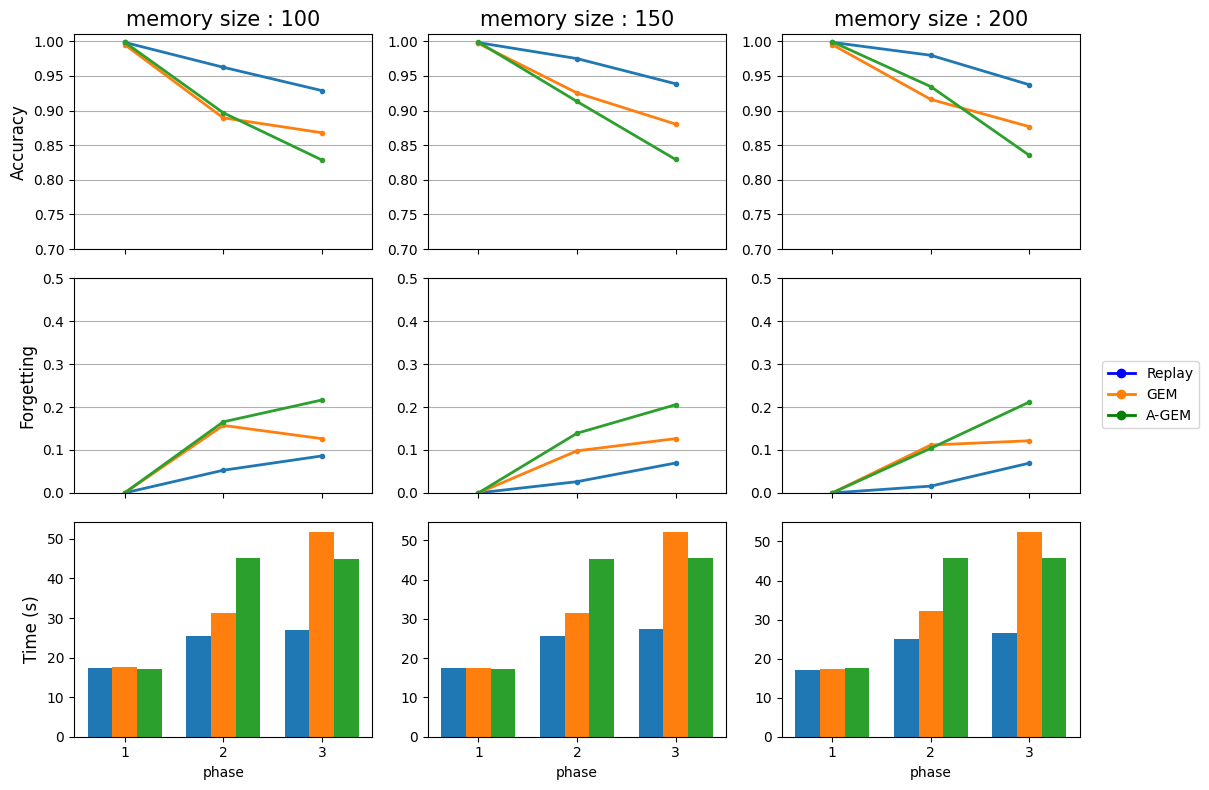

In [60]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np
import json
import os

os.chdir('/home/kyjub/RTES_ws/DeepFault/')
memory_size = [int(100), int(150), int(200)]
ms_gem = 0.1
fig, axes = plt.subplots(3, 3, sharex='all', figsize=(11, 8))
x_labels = ['1', '2', '3']
x = np.arange(len(x_labels))
width = 0.25


# Replay 전략 그래프
for i, ms in enumerate(memory_size):
    results_agem = [json.load(open(f"AddPluginWDCNN2_REPLAY_memory_size:{ms}_0829/WDCNN2_level_3_replay_memory_size={ms}_results.json", 'r'))]
    avg_accs_agem, avg_forgetting_agem= [], []
    for result in results_agem:
        avg_accs_agem.append([metric['avg_accuracy'] for metric in result])
        avg_forgetting_agem.append([metric['avg_forgetting'] for metric in result])

    mean_accs_agem = np.mean(avg_accs_agem, axis=1)
    mean_forgetting_agem = np.mean(avg_forgetting_agem, axis=1)

    axes[0][i].plot(x_labels, mean_accs_agem[0], '-o', markersize=3, linewidth=2, label='Replay')
    axes[0][i].set_title(f"memory size : {ms}", fontsize=15)

    axes[1][i].plot(x_labels, mean_forgetting_agem[0], '-o', markersize=3, linewidth=2, label='Replay')

    with open(f"AddPluginWDCNN2_REPLAY_memory_size:{ms}_0829/WDCNN2_level_3_replay_memory_size={ms}_time.json", 'r') as f:
        task_times_gem = json.load(f)
    
    task_times_gem = task_times_gem[0]
    
    task_names = list(task_times_gem.keys())
    task_values = list(task_times_gem.values())

    axes[2][i].bar(x-width, task_values, width, label='REPLAY')


# GEM 전략 그래프
for i, pattern in enumerate(memory_size):
    results_gem = [json.load(open(f"AddPluginWDCNN2_GEM_ppe:{pattern}_ms:0.1_0829/WDCNN2_level_3_gem_patterns_per_exp={pattern}_memory_strength=0.1_results.json", 'r'))]
    avg_accs_gem, avg_forgetting_gem = [], []
    for result in results_gem:
        avg_accs_gem.append([metric['avg_accuracy'] for metric in result])
        avg_forgetting_gem.append([metric['avg_forgetting'] for metric in result])

    mean_accs_gem = np.mean(avg_accs_gem, axis=1)
    mean_forgetting_gem = np.mean(avg_forgetting_gem, axis=1)

    axes[0][i].plot(x_labels, mean_accs_gem[0], '-o', markersize=3, linewidth=2, label='GEM')

    axes[1][i].plot(x_labels, mean_forgetting_gem[0], '-o', markersize=3, linewidth=2, label='GEM')

    with open(f"AddPluginWDCNN2_GEM_ppe:{pattern}_ms:0.1_0829/WDCNN2_level_3_gem_patterns_per_exp={pattern}_memory_strength=0.1_time.json", 'r') as f:
        task_times_gem = json.load(f)
    
    task_times_gem = task_times_gem[0]
    
    task_names = list(task_times_gem.keys())
    task_values = list(task_times_gem.values())

    axes[2][i].bar(x, task_values, width, label='GEM')



# A-GEM 전략 그래프
for i, ms in enumerate(memory_size):
    results_agem = [json.load(open(f"AddPluginWDCNN2_AGEM_ppe:{ms}_sample_size:128_0829/WDCNN2_level_3_agem_patterns_per_exp={ms}_results.json", 'r'))]
    avg_accs_agem, avg_forgetting_agem= [], []
    for result in results_agem:
        avg_accs_agem.append([metric['avg_accuracy'] for metric in result])
        avg_forgetting_agem.append([metric['avg_forgetting'] for metric in result])

    mean_accs_agem = np.mean(avg_accs_agem, axis=1)
    mean_forgetting_agem = np.mean(avg_forgetting_agem, axis=1)

    axes[0][i].plot(x_labels, mean_accs_agem[0], '-o', markersize=3, linewidth=2, label='A-GEM')
    axes[1][i].plot(x_labels, mean_forgetting_agem[0], '-o', markersize=3, linewidth=2, label='A-GEM')

    with open(f"AddPluginWDCNN2_AGEM_ppe:{ms}_sample_size:128_0829/WDCNN2_level_3_agem_patterns_per_exp={ms}_time.json", 'r') as f:
        task_times_agem = json.load(f)
    
    task_times_agem = task_times_agem[0]
    
    task_names = list(task_times_agem.keys())
    task_values = list(task_times_agem.values())

    axes[2][i].bar(x+ width, task_values, width, label='A-GEM')



for row in range(3):
    for col in range(3):
        if row == 0:
            axes[row][col].set_ylim(0.70, 1.01)
            axes[row][col].set_yticks(np.arange(0.70, 1.01, 0.05))
            axes[row][col].grid(True, axis='y')
        if row == 1:
            axes[row][col].set_ylim(0, 0.5)
            axes[row][col].grid(True, axis='y')
        if row == 2:
            axes[row][col].set_xticks(x)
            axes[row][col].set_xticklabels(x_labels)
            axes[row][col].set_xlabel("phase")
axes[0][0].set_ylabel('Accuracy', fontsize=12)
axes[1][0].set_ylabel('Forgetting', fontsize=12)
axes[2][0].set_ylabel('Time (s)', fontsize=12)

# 전체 그래프의 우측에 범례(legend) 추가
custom_lines = [Line2D([0], [0], color='blue', lw=2, marker='o'),
                Line2D([0], [0], color='#FF8000', lw=2, marker='o'),
                Line2D([0], [0], color='green', lw=2, marker='o')]
# fig.legend(custom_lines, ['GEM', 'Replay','A-GEM'], loc='center left', bbox_to_anchor=(1, 0.5))
fig.legend(custom_lines, ['Replay', 'GEM','A-GEM'], loc='center left', bbox_to_anchor=(1, 0.5))


plt.tight_layout()
plt.savefig(f'strategy_results_comparison.png', dpi=300, bbox_inches='tight')


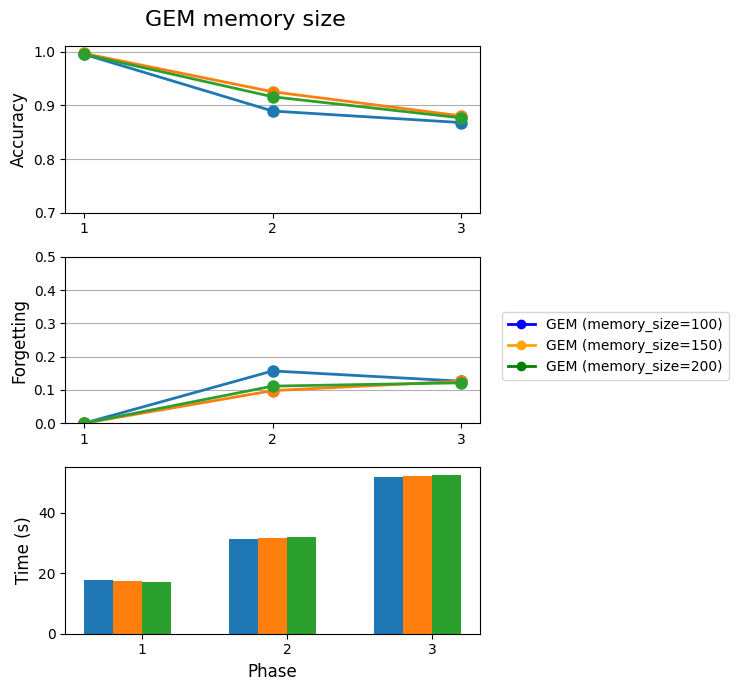

In [81]:
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
import numpy as np
import json
import os

os.chdir('/home/kyjub/RTES_ws/DeepFault/')  # 실제 작업 디렉토리로 변경
memory_size = [100, 150, 200]  # 메모리 크기 설정
ms_gem = 0.1

fig, axes = plt.subplots(3, 1, figsize=(5, 7))  # 3x1 plot 생성
fig.suptitle('GEM memory size', fontsize=16)
x_labels = ['1', '2', '3']
x = np.arange(len(x_labels))

linestyles = ['-', '-', '-']  # 선 스타일
markers = ['o', 'o', 'o']  # 마커 스타일

# GEM 전략 그래프
for i, pattern in enumerate(memory_size):
    results_gem = [json.load(open(f"AddPluginWDCNN2_GEM_ppe:{pattern}_ms:0.1_0829/WDCNN2_level_3_gem_patterns_per_exp={pattern}_memory_strength=0.1_results.json", 'r'))]
    avg_accs_gem, avg_forgetting_gem = [], []
    for result in results_gem:
        avg_accs_gem.append([metric['avg_accuracy'] for metric in result])
        avg_forgetting_gem.append([metric['avg_forgetting'] for metric in result])

    mean_accs_gem = np.mean(avg_accs_gem, axis=(0,1))
    mean_forgetting_gem = np.mean(avg_forgetting_gem, axis=(0,1))

    axes[0].plot(x_labels, mean_accs_gem, linestyle=linestyles[i], markersize=8, linewidth=2, marker=markers[i], label=f'GEM (memory_size={pattern})')
    axes[1].plot(x_labels, mean_forgetting_gem, linestyle=linestyles[i], markersize=8, linewidth=2, marker=markers[i], label=f'GEM (memory_size={pattern})')

    with open(f"AddPluginWDCNN2_GEM_ppe:{pattern}_ms:0.1_0829/WDCNN2_level_3_gem_patterns_per_exp={pattern}_memory_strength=0.1_time.json", 'r') as f:
        task_times_gem = json.load(f)

    task_times_gem = task_times_gem[0]
    task_values = list(task_times_gem.values())

    axes[2].bar(x + i*0.2 - 0.3, task_values, width=0.2, label=f'GEM (memory_size={pattern})')

# 축 설정 및 그리드 추가
for ax in axes:
    if ax != axes[2]:
        ax.grid(True, axis='y')


axes[0].set_ylim(0.70, 1.01)
axes[0].set_ylabel('Accuracy', fontsize=12)
axes[1].set_ylim(0, 0.5)
axes[1].set_ylabel('Forgetting', fontsize=12)
axes[2].set_xticks(x)
axes[2].set_xticklabels(x_labels)
axes[2].set_xlabel("Phase", fontsize=12)
axes[2].set_ylabel('Time (s)', fontsize=12)
# 전체 그래프의 우측에 범례(legend) 추가
custom_lines = [Line2D([0], [0], color='blue', lw=2, marker='o'),
                Line2D([0], [0], color='orange', lw=2, marker='o'),
                Line2D([0], [0], color='green', lw=2, marker='o')]

fig.legend(custom_lines, [f'GEM (memory_size={ms})' for ms in memory_size], loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()  # suptitle에 공간을 주기 위해 조정



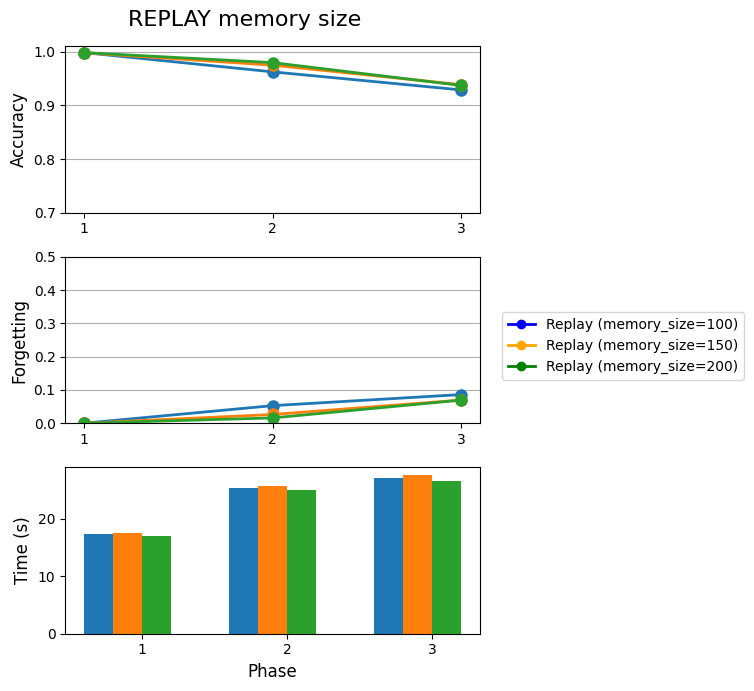

In [80]:
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
import numpy as np
import json
import os

os.chdir('/home/kyjub/RTES_ws/DeepFault/')  # 실제 작업 디렉토리로 변경
memory_size = [100, 150, 200]  # 메모리 크기 설정

fig, axes = plt.subplots(3, 1, figsize=(5, 7))  # 3x1 plot 생성
fig.suptitle('REPLAY memory size', fontsize=16)
x_labels = ['1', '2', '3']
x = np.arange(len(x_labels))

linestyles = ['-', '-', '-']  # 선 스타일
markers = ['o', 'o', 'o']  # 마커 스타일

# REPLAY 전략 그래프
for i, ms in enumerate(memory_size):
    results_agem = [json.load(open(f"AddPluginWDCNN2_REPLAY_memory_size:{ms}_0829/WDCNN2_level_3_replay_memory_size={ms}_results.json", 'r'))]
    avg_accs_agem, avg_forgetting_agem = [], []
    for result in results_agem:
        avg_accs_agem.append([metric['avg_accuracy'] for metric in result])
        avg_forgetting_agem.append([metric['avg_forgetting'] for metric in result])

    mean_accs_agem = np.mean(avg_accs_agem, axis=(0,1))
    mean_forgetting_agem = np.mean(avg_forgetting_agem, axis=(0,1))

    axes[0].plot(x_labels, mean_accs_agem, linestyle=linestyles[1], markersize=8, linewidth=2, marker=markers[1], label=f'REPLAY (memory_size={ms})')
    axes[1].plot(x_labels, mean_forgetting_agem, linestyle=linestyles[1], markersize=8, linewidth=2, marker=markers[1], label=f'REPLAY (memory_size={ms})')

    with open(f"AddPluginWDCNN2_REPLAY_memory_size:{ms}_0829/WDCNN2_level_3_replay_memory_size={ms}_time.json", 'r') as f:
        task_times_replay = json.load(f)

    task_times_replay = task_times_replay[0]
    task_values = list(task_times_replay.values())

    axes[2].bar(x + i*0.2 - 0.3, task_values, width=0.2, label=f'GEM (memory_size={pattern})')

# 축 설정 및 그리드 추가
for ax in axes:
    if ax != axes[2]:
        ax.grid(True, axis='y')


axes[0].set_ylim(0.70, 1.01)
axes[0].set_ylabel('Accuracy', fontsize=12)
axes[1].set_ylim(0, 0.5)
axes[1].set_ylabel('Forgetting', fontsize=12)
axes[2].set_xticks(x)
axes[2].set_xticklabels(x_labels)
axes[2].set_xlabel("Phase", fontsize=12)
axes[2].set_ylabel('Time (s)', fontsize=12)
# 전체 그래프의 우측에 범례(legend) 추가
custom_lines = [Line2D([0], [0], color='blue', lw=2, marker='o'),
                Line2D([0], [0], color='orange', lw=2, marker='o'),
                Line2D([0], [0], color='green', lw=2, marker='o')]

fig.legend(custom_lines, [f'Replay (memory_size={ms})' for ms in memory_size], loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()


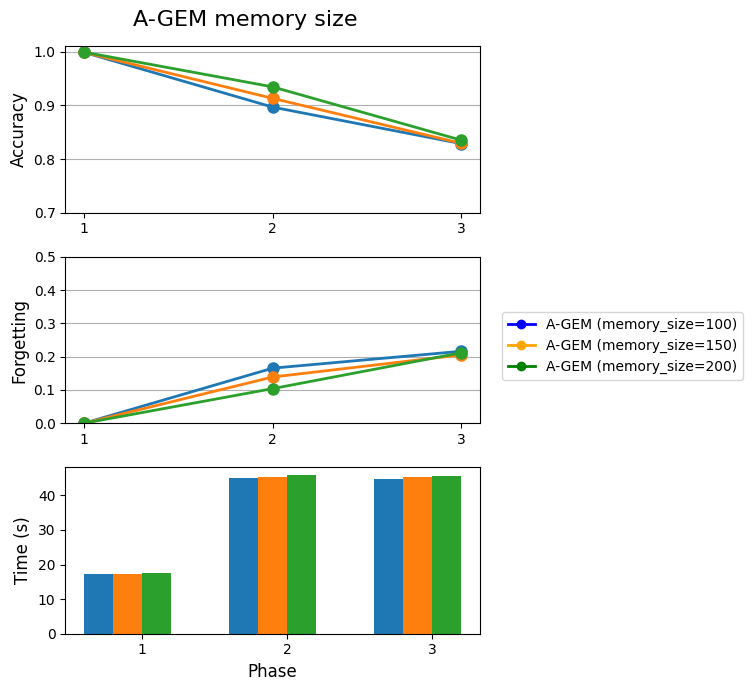

In [83]:
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
import numpy as np
import json
import os

os.chdir('/home/kyjub/RTES_ws/DeepFault/')  # 실제 작업 디렉토리로 변경
memory_size = [100, 150, 200]  # 메모리 크기 설정

fig, axes = plt.subplots(3, 1, figsize=(5, 7))  # 3x1 plot 생성
fig.suptitle('A-GEM memory size', fontsize=16)
x_labels = ['1', '2', '3']
x = np.arange(len(x_labels))

linestyles = ['-', '-', '-']  # 선 스타일
markers = ['o', 'o', 'o']  # 마커 스타일

# REPLAY 전략 그래프
for i, ms in enumerate(memory_size):
    results_agem = [json.load(open(f"AddPluginWDCNN2_AGEM_ppe:{ms}_sample_size:128_0829/WDCNN2_level_3_agem_patterns_per_exp={ms}_results.json", 'r'))]
    avg_accs_agem, avg_forgetting_agem = [], []
    for result in results_agem:
        avg_accs_agem.append([metric['avg_accuracy'] for metric in result])
        avg_forgetting_agem.append([metric['avg_forgetting'] for metric in result])

    mean_accs_agem = np.mean(avg_accs_agem, axis=(0,1))
    mean_forgetting_agem = np.mean(avg_forgetting_agem, axis=(0,1))

    axes[0].plot(x_labels, mean_accs_agem, linestyle=linestyles[1], markersize=8, linewidth=2, marker=markers[1], label=f'AGEM (memory_size={ms})')
    axes[1].plot(x_labels, mean_forgetting_agem, linestyle=linestyles[1], markersize=8, linewidth=2, marker=markers[1], label=f'AGEM (memory_size={ms})')

    with open(f"AddPluginWDCNN2_AGEM_ppe:{ms}_sample_size:128_0829/WDCNN2_level_3_agem_patterns_per_exp={ms}_time.json", 'r') as f:
        task_times_replay = json.load(f)

    task_times_replay = task_times_replay[0]
    task_values = list(task_times_replay.values())

    axes[2].bar(x + i*0.2 - 0.3, task_values, width=0.2, label=f'A-GEM (memory_size={pattern})')

# 축 설정 및 그리드 추가
for ax in axes:
    if ax != axes[2]:
        ax.grid(True, axis='y')


axes[0].set_ylim(0.70, 1.01)
axes[0].set_ylabel('Accuracy', fontsize=12)
axes[1].set_ylim(0, 0.5)
axes[1].set_ylabel('Forgetting', fontsize=12)
axes[2].set_xticks(x)
axes[2].set_xticklabels(x_labels)
axes[2].set_xlabel("Phase", fontsize=12)
axes[2].set_ylabel('Time (s)', fontsize=12)
# 전체 그래프의 우측에 범례(legend) 추가
custom_lines = [Line2D([0], [0], color='blue', lw=2, marker='o'),
                Line2D([0], [0], color='orange', lw=2, marker='o'),
                Line2D([0], [0], color='green', lw=2, marker='o')]

fig.legend(custom_lines, [f'A-GEM (memory_size={ms})' for ms in memory_size], loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()


In [87]:
os.chdir('/home/kyjub/RTES_ws/DeepFault/')  # 실제 작업 디렉토리로 변경
results_naive = [json.load(open(f"AddPluginWDCNN2_NAIVE_0829/WDCNN2_level_3_naive_SGD_lr_0.01_momentum_0_l2_reg_0.01_results.json", 'r'))]
results_gem = [json.load(open(f"AddPluginWDCNN2_GEM_ppe:100_ms:0.1_0829/WDCNN2_level_3_gem_patterns_per_exp=100_memory_strength=0.1_results.json", 'r'))]
results_replay = [json.load(open(f"AddPluginWDCNN2_REPLAY_memory_size:100_0829/WDCNN2_level_3_replay_memory_size=100_results.json", 'r'))]
results_lwf = [json.load(open(f"AddPluginWDCNN2_LWF_alpha:0.5_0829/WDCNN2_level_3_lwf_alpha=0.5_results.json", 'r'))]
results_ewc = [json.load(open(f"AddPluginWDCNN2_EWC_lambda:0.5_0829/WDCNN2_level_3_ewc_SGD_lr_0.01_momentum_0_l2_reg_0.01_results.json", 'r'))]

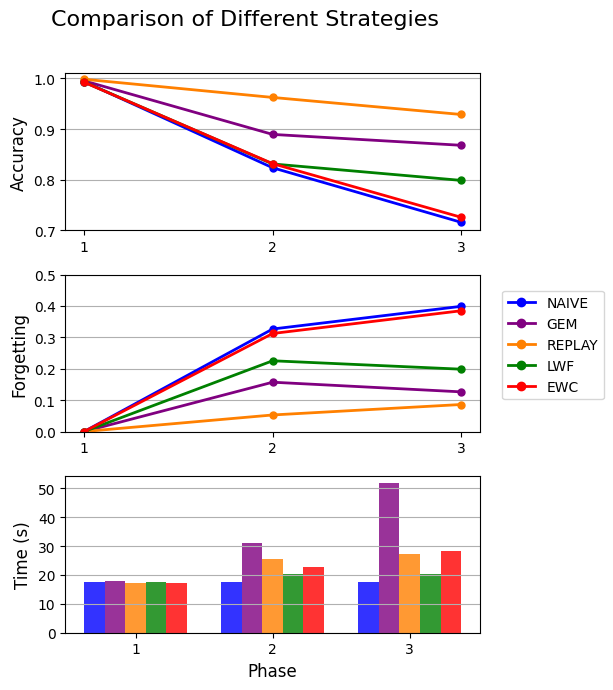

In [111]:
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
import numpy as np
import json
import os

# 작업 디렉토리 설정
os.chdir('/home/kyjub/RTES_ws/DeepFault/')

fig, axes = plt.subplots(3, 1, figsize=(5, 7))
fig.suptitle('Comparison of Different Strategies', fontsize=16)

x_labels = ['1', '2', '3']
x = np.arange(len(x_labels))

strategies = ['NAIVE', 'GEM', 'REPLAY', 'LWF', 'EWC']
colors = ['b', 'purple', '#FF8000','g','r']
markers = ['o', 'o', 'o', 'o', 'o']

# 파일 위치 및 데이터 로드
file_paths = {
    'NAIVE': "AddPluginWDCNN2_NAIVE_0829/WDCNN2_level_3_naive_SGD_lr_0.01_momentum_0_l2_reg_0.01_results.json",
    'GEM': "AddPluginWDCNN2_GEM_ppe:100_ms:0.1_0829/WDCNN2_level_3_gem_patterns_per_exp=100_memory_strength=0.1_results.json",
    'REPLAY': "AddPluginWDCNN2_REPLAY_memory_size:100_0829/WDCNN2_level_3_replay_memory_size=100_results.json",
    'LWF': "AddPluginWDCNN2_LWF_alpha:0.5_0829/WDCNN2_level_3_lwf_alpha=0.5_results.json",
    'EWC': "AddPluginWDCNN2_EWC_lambda:0.5_0829/WDCNN2_level_3_ewc_SGD_lr_0.01_momentum_0_l2_reg_0.01_results.json"
}
time_paths = {
    'NAIVE': "AddPluginWDCNN2_NAIVE_0829/WDCNN2_level_3_naive_SGD_lr_0.01_momentum_0_l2_reg_0.01_time.json",
    'GEM': "AddPluginWDCNN2_GEM_ppe:100_ms:0.1_0829/WDCNN2_level_3_gem_patterns_per_exp=100_memory_strength=0.1_time.json",
    'REPLAY': "AddPluginWDCNN2_REPLAY_memory_size:100_0829/WDCNN2_level_3_replay_memory_size=100_time.json",
    'LWF': "AddPluginWDCNN2_LWF_alpha:0.5_0829/WDCNN2_level_3_lwf_alpha=0.5_time.json",
    'EWC': "AddPluginWDCNN2_EWC_lambda:0.5_0829/WDCNN2_level_3_ewc_SGD_lr_0.01_momentum_0_l2_reg_0.01_time.json"
}

for i, strategy in enumerate(strategies):
    results = [json.load(open(file_paths[strategy], 'r'))]
    avg_accs, avg_forgetting = [], []
    
    for result in results:
        avg_accs.append([metric['avg_accuracy'] for metric in result])
        avg_forgetting.append([metric['avg_forgetting'] for metric in result])

    mean_accs = np.mean(avg_accs, axis=(0,1))
    mean_forgetting = np.mean(avg_forgetting, axis=(0,1))

    axes[0].plot(x_labels, mean_accs, linestyle='-', markersize=5, linewidth=2, marker=markers[i], color=colors[i], label=f'{strategy}')
    axes[1].plot(x_labels, mean_forgetting, linestyle='-', markersize=5, linewidth=2, marker=markers[i], color=colors[i], label=f'{strategy}')

bar_width = 0.15  
for i, strategy in enumerate(strategies):
    with open(time_paths[strategy], 'r') as f:
        task_times = json.load(f)

    task_times = task_times[0]
    task_values = list(task_times.values())

    axes[2].bar(x + i*bar_width - 0.3, task_values, width=bar_width, label=f'{strategy}',color=colors[i],alpha=0.8) 



# 축 설정 및 그리드 추가
for ax in axes:
    ax.grid(True, axis='y')

axes[0].set_ylim(0.70, 1.01)
axes[0].set_ylabel('Accuracy', fontsize=12)
axes[1].set_ylim(0, 0.5)
axes[1].set_ylabel('Forgetting', fontsize=12)
axes[2].set_xticks(x)
axes[2].set_xticklabels(x_labels)
axes[2].set_xlabel("Phase", fontsize=12)
axes[2].set_ylabel('Time (s)', fontsize=12)
axes[2].set_yticks(np.arange(0, 60, 10))

# 범례 추가
custom_lines = [Line2D([0], [0], color=colors[i], lw=2, marker=markers[i]) for i in range(len(strategies))]
fig.legend(custom_lines, strategies, loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('strategy_comparison.png', dpi=300, bbox_inches='tight')
plt.show()


## 예전꺼

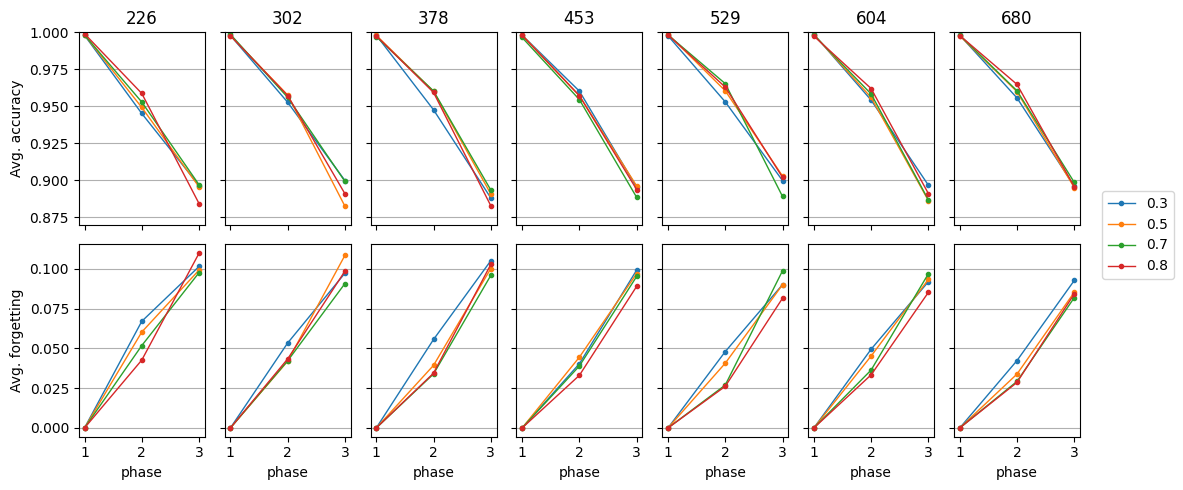

In [23]:
# fig, axes = plt.subplots(2, 7, sharex='all', sharey='row', figsize=(11, 5))
# for i, pattern in enumerate(patterns_per_exp):
#     results = [json.load(open(f"WDCNN2_GEM_ Pattens:{pattern}_ms:{ms}_0729/WDCNN2_level_3_gem_patterns_per_exp={pattern}_memory_strength={ms}_results.json", 'r')) for ms in memory_strength]

#     avg_accs = []
#     avg_forgetting = []
#     for result in results:
#         avg_accs.append([metric['avg_accuracy'] for metric in result])
#         avg_forgetting.append([metric['avg_forgetting'] for metric in result])
    
#     mean_accs = np.mean(avg_accs, axis=1)
#     mean_forgetting = np.mean(avg_forgetting, axis=1)

#     avg_plot_args = []
#     forgetting_plot_args = []
#     x = ['1', '2', '3']
#     for idx, strat in enumerate(memory_strength):
#         avg_plot_args.append(x)
#         avg_plot_args.append(mean_accs[idx])
#         avg_plot_args.append('-o')

#         forgetting_plot_args.append(x)
#         forgetting_plot_args.append(mean_forgetting[idx])
#         forgetting_plot_args.append('-o')

#     axes[0][i].plot(*avg_plot_args, markersize=3, linewidth=1)  ###
#     axes[0][i].set_title(f"{pattern}")
#     if i == 0:
#         axes[0][i].set_ylabel("Avg. accuracy")
#     axes[0][i].set_ylim(0.87, 1.)
#     axes[0][i].grid(True, axis='y')

#     axes[1][i].plot(*forgetting_plot_args, markersize=3, linewidth=1)
#     if i == 0:
#         axes[1][i].set_ylabel("Avg. forgetting")
#     axes[1][i].set_xlabel("phase")
#     axes[1][i].grid(True, axis='y')
    
# fig.legend(memory_strength, loc='center left', bbox_to_anchor=(1, 0.52))
# plt.tight_layout()
# plt.savefig(f'strategy_results_graph.png', dpi=300, bbox_inches='tight')

In [ ]:
# ## 이전꺼
# class CLExperiment:
    
#     def __init__(self, opt) -> None:

#         self.opt = opt
#         self.data_handler = data_handler
#         self.avg_results = []
#         self.time_results = []

#     def get_attr(self, name: str):
#         if hasattr(self.opt, name):
#             return getattr(self.opt, name)
#         else:
#             return None

#     def _make_benchmark_with_level(self, data_handler: DatasetHandler, level: int):

#         assert level in [1, 2, 3], "Benchmark level must be one of (1, 2, 3)"

#         train_set_list = [data_handler.dataloaders[f'{level}{task}']['train'].dataset for task in ('A', 'B', 'C')]
#         test_set_list = [data_handler.dataloaders[f'{level}{task}']['test'].dataset for task in ('A', 'B', 'C')]

#         # 'make_classification_dataset' requires that the dataset has an attribute named 'targets'
#         for train_set, test_set in zip(train_set_list, test_set_list):
#             setattr(train_set, 'targets', train_set.label)
#             setattr(test_set, 'targets', test_set.label)

#         # AvalancheDatasets with task labels
#         train_set_list = [make_classification_dataset(dataset, task_labels=idx) for idx, dataset in enumerate(train_set_list)]
#         test_set_list = [make_classification_dataset(dataset, task_labels=idx) for idx, dataset in enumerate(test_set_list)]

#         # Compose benchmark
#         self.scenario = dataset_benchmark(
#             train_set_list,
#             test_set_list
#         )

#     def initialize(self, model, scenario=None, optimizer=None, criterion=None, eval_plugin=None):
        
#         self.model = model
#         level = self.get_attr('level')

#         if not scenario:
#             self._make_benchmark_with_level(self.data_handler, level)
#         else:
#             self.scenario = scenario

#         self._initialize_trainig_stuff(self.model, optimizer, criterion)
#         self._initialize_cl_strategy(eval_plugin)


#     def _initialize_trainig_stuff(self, model: nn.Module, optimizer=None, criterion=None):

#         lr = self.get_attr('lr')
#         momentum = self.get_attr('momentum')
#         weight_decay = self.get_attr('weight_decay')

#         if not optimizer:
#             optimizer = SGD(
#                 model.parameters(), lr=lr,
#                 momentum=momentum, weight_decay=weight_decay
#             )
#         self.optimizer = optimizer

#         if not criterion:
#             criterion = CrossEntropyLoss()
#         self.criterion = criterion

#     def _initialize_cl_strategy(self, eval_plugin):

#         if not eval_plugin:
#             eval_plugin = EvaluationPlugin(
#                 accuracy_metrics(epoch=True, experience=True, stream=True),
#                 loss_metrics(epoch=True, experience=True, stream=True),
#                 forgetting_metrics(experience=True, stream=True),
#                 timing_metrics(epoch=True), ## 최근에 추가된 metric
#                 loggers=self._initialize_loggers(self.get_attr('interactive'))
#             )

#         cl_type = self.get_attr('strategy').lower()

#         common_args = dict(
#             model=self.model,
#             optimizer=self.optimizer,
#             criterion=self.criterion,
#             train_epochs=self.get_attr('epoch'),
#             train_mb_size=self.get_attr('batch_size'),
#             eval_mb_size=self.get_attr('batch_size'),
#             device=self.get_attr('device'),
#             evaluator=eval_plugin
#         )

#         if cl_type == 'naive':
#             self.strategy = Naive(**common_args)
#         elif cl_type == 'replay':
#             self.strategy = Replay(
#                 **common_args,
#                 mem_size=self.get_attr('memory_size')
#             )
#         elif cl_type == 'joint':
#             self.strategy = JointTraining(**common_args)
#         elif cl_type == 'cumulative':
#             self.strategy = Cumulative(**common_args)

#         elif cl_type == 'cwrstar':
#             self.strategy = CWRStar(
#                 cwr_layer_name='conv_layers',   ####### WDCNN2 아키텍처 기준
#                 **common_args
#             )
#         elif cl_type == 'gdumb':
#             self.strategy = GDumb(
#                 **common_args
#             )
#         elif cl_type == 'lwf':
#             self.strategy = LwF(
#                 alpha=self.get_attr('alpha4lwf'),  # 0 과 1 사이의 값. 낮을수록 이전 task 지식 유지
#                 temperature=1.2, 
#                 **common_args
#             )
#         elif cl_type == 'gem':
#             self.strategy = GEM(
#                 patterns_per_exp=self.get_attr('patterns_per_exp4gem'),  # len(data_handler.dataloaders["3B"]["train"].dataset)=756
#                 memory_strength=self.get_attr('memory_strength4gem'),  # 0 과 1 사이의 값. 높을수록 이전 task 지식 유지
#                 **common_args
#             )
#         elif cl_type == 'ewc':
#             self.strategy = EWC(
#                 ewc_lambda=1e-2,  # 1e-2 ~1e-4 사이의 값.
#                 **common_args
#             )
#         elif cl_type == 'agem':
#             self.strategy = AGEM(
#                 patterns_per_exp=self.get_attr('patterns_per_exp4agem'),  
#                 sample_size=self.get_attr('sample_size4agem'),
#                 **common_args
#             )
#         else:
#             raise NotImplementedError(f"CL strategy '{cl_type}' has not been implemented yet!!!")


#     def _make_param_string(self):
#         model_name = type(self.model).__name__
#         level = str(self.get_attr('level'))
#         strategy = self.get_attr('strategy')
        
#         optimizer = type(self.optimizer).__name__
#         lr = self.get_attr('lr')
#         weight_decay = self.get_attr('weight_decay')
#         momentum = self.get_attr('momentum')

#         if strategy.lower() == 'lwf':
#             Alpha = self.get_attr('alpha4lwf')
#             return f'{model_name}_level_{level}_{strategy}_alpha={Alpha}'
#         elif strategy.lower() == 'gem':
#             patterns_per_exp = self.get_attr('patterns_per_exp4gem')
#             memory_strength = self.get_attr('memory_strength4gem')
#             return f'{model_name}_level_{level}_{strategy}_patterns_per_exp={patterns_per_exp}_memory_strength={memory_strength}'
#         elif strategy.lower() == 'replay':
#             memory_size = self.get_attr('memory_size')
#             return f'{model_name}_level_{level}_{strategy}_memory_size={memory_size}'
#         elif strategy.lower() == 'agem':
#             patterns_per_exp = self.get_attr('patterns_per_exp4gem')
#             return f'{model_name}_level_{level}_{strategy}_patterns_per_exp={patterns_per_exp}'
#         else:
#             return f'{model_name}_level_{level}_{strategy}_{optimizer}_lr_{lr}_momentum_{momentum}_l2_reg_{weight_decay}'
        

#     def _make_log_path(self):
#         save_folder = self.get_attr('save_folder_name')
#         os.makedirs(save_folder, exist_ok=True)
#         log_path = os.path.join(save_folder, self._make_param_string() + '.log')  
#         return log_path

#     def _initialize_loggers(self, interactive=True, text=True,):
#         loggers = []
#         if interactive:
#             loggers.append(InteractiveLogger())
#         if text:
#             log_path = self._make_log_path()
#             loggers.append(TextLogger(open(log_path, 'a')))
#         self.loggers = loggers
#         return self.loggers


#     def _get_exp_metric_key(self, metric: str, phase: str, task: int, exp: int=None):

#         if not exp:
#             exp = task

#         if metric.lower() == 'acc':
#             header = 'Top1_Acc_Exp'
#         elif metric.lower() == 'loss':
#             header = 'Loss_Exp'
#         elif metric.lower() == 'forgetting':
#             header = 'ExperienceForgetting'
#         elif metric.lower() == 'timing':   ### 추가함
#             header = 'Time_Epoch'
#             return f'{header}/train_phase/train_stream/Task{task:>03d}'

#         return f'{header}/{phase}_phase/test_stream/Task{task:>03d}/Exp{exp:>03d}'


#     def _get_metrics_for_joint(self, result):  
#         metrics = dict()
#         avg_accuracy = [result[-1][self._get_exp_metric_key('acc', 'eval', task)] for task in range(3)]
#         avg_forgetting = [result[-1][self._get_exp_metric_key('forgetting', 'eval', task)] for task in range(3)]

#         metrics['avg_accuracy'] = avg_accuracy
#         metrics['avg_forgetting'] = avg_forgetting

#         return metrics

#     def _get_avg_metrics(self, result):  
#         if self.get_attr('strategy').lower() == 'joint':
#             return self._get_metrics_for_joint()

#         num_tasks = len(result)

#         metrics = dict()
#         avg_accuracy = []
#         avg_forgetting = []

#         for current in range(num_tasks):
#             accuracies = [result[current][self._get_exp_metric_key('acc', 'eval', past)] for past in range(current+1)]
#             forgettings = [result[current][self._get_exp_metric_key('forgetting', 'eval', past)] for past in range(current)]

#             avg_accuracy.append(np.mean(accuracies))
#             if forgettings:
#                 avg_forgetting.append(np.mean(forgettings))
#             else:
#                 avg_forgetting.append(0)

#         metrics['avg_accuracy'] = avg_accuracy
#         metrics['avg_forgetting'] = avg_forgetting
        
#         return metrics


#     def _get_text_logger(self):

#         for logger in self.loggers:
#             if isinstance(logger, TextLogger):
#                 return logger
#         return None


#     def _append_results(self, results):
#         text_logger = self._get_text_logger()

#         num_tasks = len(results) # 3
#         for task in range(num_tasks):
#             time_metrics = self.calcul_time_elapse(task)
#             self.time_results.append(time_metrics)
#             print(f'@@@ time_metrics : {time_metrics} ||  task : {task} ')
#             if text_logger:
#                 print(time_metrics, file=text_logger.file, flush=True)

#         avg_metrics = self._get_avg_metrics(results)
#         self.avg_results.append(avg_metrics)
        
#         print('@@@ avg_metrics : ',avg_metrics)

#         if text_logger:
#             print(avg_metrics, file=text_logger.file, flush=True)

#     def save_results(self, filename=None):
#         if not filename:
#             filename = self._make_param_string() + '_results.json'
        
#         save_folder = self.get_attr('save_folder_name')
#         os.makedirs(save_folder, exist_ok=True)
        
#         filepath = os.path.join(save_folder, filename)
#         json.dump(self.avg_results, open(filepath, 'a'), indent=4)
#         json.dump(self.time_results, open(filepath, 'a'), indent=4)

#     def get_best_result(self):

#         final_avg_acc = [metrics['avg_accuracy'][-1] for metrics in self.avg_results]
#         best_result_idx = np.argmax(final_avg_acc)
        
#         return best_result_idx, self.avg_results[best_result_idx]


#     def _execute_joint_training(self):

#         results = []

#         self.strategy.train(self.scenario.train_stream)
#         results.append(self.strategy.eval(self.scenario.test_stream))
#         self._append_results(results)


#     def _execute(self):

#         results = []

#         for exp in self.scenario.train_stream:  # 3개
#             self.strategy.train(exp)
#             results.append(self.strategy.eval(self.scenario.test_stream))

#         self._append_results(results)


#     def execute(self, exec_id=0):
#         for logger in self.loggers:
#             if isinstance(logger, TextLogger):
#                 print(f"Start execution {exec_id}!!!", file=logger.file, flush=True)

#         if self.get_attr('strategy') == 'joint':
#             self._execute_joint_training()
#         else:
#             self._execute()


#     def calcul_time_elapse(self, task_num): 
#         log_file_path =  self._make_log_path()
#         repeat = self.get_attr('repeat')
#         total_time = 0.0
#         with open(log_file_path, 'r') as file:
#             for line in file:
#                 if f"Time_Epoch/train_phase/train_stream/Task{task_num:>03d}" in line:
#                     time_value = float(line.split('=')[-1].strip())
#                     total_time += (time_value)

#         return total_time/repeat  ## 해당 task_num에서의 모델 학습 시간

In [ ]:
# # 이전꺼
# def start_experiment(opt):

#     cl_experiment = CLExperiment(opt)

#     repeat = cl_experiment.get_attr('repeat')
#     level = cl_experiment.get_attr('level')

#     for idx in range(repeat):
#         model = WDCNN2(n_classes=classes_in_level(level))

#         cl_experiment.initialize(model) 
#         cl_experiment.execute(idx)

#     cl_experiment.save_results()
